In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from hampel import hampel
from scipy.signal import savgol_filter

In [2]:
assenza_rx1 = pd.read_csv('Dati_4_link/Assenzarx1.csv')
assenza_rx2= pd.read_csv('Dati_4_link/Assenzarx2.csv')

una_movimento_rx1=pd.read_csv('Dati_4_link/Una_movimentorx1.csv')
una_movimento_rx2=pd.read_csv('Dati_4_link/Una_movimentorx2.csv')

una_ferma_rx1=pd.read_csv('Dati_4_link/Una_fermarx1.csv')
una_ferma_rx2=pd.read_csv('Dati_4_link/Una_fermarx2.csv')

due_movimento_rx1=pd.read_csv('Dati_4_link/Due_movimentorx1.csv')
due_movimento_rx2=pd.read_csv('Dati_4_link/Due_movimentorx2.csv')

due_ferme_rx1=pd.read_csv('Dati_4_link/Due_fermerx1.csv')
due_ferme_rx2=pd.read_csv('Dati_4_link/Due_fermerx2.csv')

tre_ferme_rx1=pd.read_csv('Dati_4_link/Tre_fermerx1.csv')
tre_ferme_rx2=pd.read_csv('Dati_4_link/Tre_fermerx2.csv')

In [3]:
def unify_and_sort_data(rx1_data, rx2_data):
    """
    Unisce i dati dei due ricevitori (rx1 e rx2) utilizzando la colonna 'host_time_ms'
    come chiave, ordina i dati per timestamp e aggiunge un identificatore per ciascun ricevitore.
    
    :param rx1_data: DataFrame contenente i dati del primo ricevitore
    :param rx2_data: DataFrame contenente i dati del secondo ricevitore
    :return: DataFrame unificato e ordinato
    """
    
    # Converte la colonna 'host_time_ms' in formato datetime
    rx1_data['host_time_ms'] = pd.to_datetime(rx1_data['host_time_ms'])
    rx2_data['host_time_ms'] = pd.to_datetime(rx2_data['host_time_ms'])
    
    # Aggiungi un identificatore per il ricevitore
    rx1_data['rx'] = 'rx1'
    rx2_data['rx'] = 'rx2'
    
    # Unisce i due DataFrame usando la colonna 'host_time_ms'
    df_combined = pd.concat([rx1_data, rx2_data], ignore_index=True)
    
    # Ordina i dati in base al timestamp 'host_time_ms'
    df_combined.sort_values(by='host_time_ms', inplace=True)
    
    return df_combined

In [4]:
def convert_to_complex(csi_data):
    # Assumiamo che csi_data sia una lista con alternanza di I e Q
    complex_data = []
    for i in range(0, len(csi_data), 2):  # passo di 2 per prendere I e Q
        real = csi_data[i]
        imag = csi_data[i+1] if i+1 < len(csi_data) else 0
        complex_data.append(complex(real, imag))
    return complex_data

In [5]:
# convertiamo le stringhe in liste di numeri 

assenza_rx1['data'] = assenza_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
assenza_rx2['data'] = assenza_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

una_movimento_rx1['data'] = una_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_movimento_rx2['data'] = una_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
una_ferma_rx1['data'] = una_ferma_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_ferma_rx2['data'] = una_ferma_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_movimento_rx1['data'] = due_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_movimento_rx2['data'] = due_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_ferme_rx1['data'] = due_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_ferme_rx2['data'] = due_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

tre_ferme_rx1['data'] = tre_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tre_ferme_rx2['data'] = tre_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [6]:
#trasformo i dati in numeri complessi
assenza_rx1['data_complex'] = assenza_rx1['data'].apply(convert_to_complex)
assenza_rx2['data_complex'] = assenza_rx2['data'].apply(convert_to_complex)

una_movimento_rx1['data_complex'] = una_movimento_rx1['data'].apply(convert_to_complex)
una_movimento_rx2['data_complex'] = una_movimento_rx2['data'].apply(convert_to_complex)

una_ferma_rx1['data_complex'] = una_ferma_rx1['data'].apply(convert_to_complex)
una_ferma_rx2['data_complex'] = una_ferma_rx2['data'].apply(convert_to_complex)

due_movimento_rx1['data_complex'] = due_movimento_rx1['data'].apply(convert_to_complex)
due_movimento_rx2['data_complex'] = due_movimento_rx2['data'].apply(convert_to_complex)

due_ferme_rx1['data_complex'] = due_ferme_rx1['data'].apply(convert_to_complex)
due_ferme_rx2['data_complex'] = due_ferme_rx2['data'].apply(convert_to_complex)

tre_ferme_rx1['data_complex'] = tre_ferme_rx1['data'].apply(convert_to_complex)
tre_ferme_rx2['data_complex'] = tre_ferme_rx2['data'].apply(convert_to_complex)



In [8]:
# Seleziona solo le colonne di interesse
columns_to_keep = ['data_complex', 'host_time_ms', 'mac']

# Rimuovi tutte le altre colonne
assenza_rx1_cleaned = assenza_rx1[columns_to_keep]
assenza_rx2_cleaned = assenza_rx2[columns_to_keep]

una_movimento_rx1_cleaned = una_movimento_rx1[columns_to_keep]
una_movimento_rx2_cleaned = una_movimento_rx2[columns_to_keep]

una_ferma_rx1_cleaned = una_ferma_rx1[columns_to_keep]
una_ferma_rx2_cleaned = una_ferma_rx2[columns_to_keep]

due_movimento_rx1_cleaned = due_movimento_rx1[columns_to_keep]
due_movimento_rx2_cleaned = due_movimento_rx2[columns_to_keep]

due_ferme_rx1_cleaned = due_ferme_rx1[columns_to_keep]
due_ferme_rx2_cleaned = due_ferme_rx2[columns_to_keep]

tre_ferme_rx1_cleaned = tre_ferme_rx1[columns_to_keep]
tre_ferme_rx2_cleaned = tre_ferme_rx2[columns_to_keep]    

In [9]:
# Separiamo i numeri complessi in colonne direttamente nel DataFrame originale
assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
assenza_rx2_cleaned[[f'{i}' for i in range(len(assenza_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx2_cleaned['data_complex'].tolist(), index=assenza_rx2_cleaned.index)

una_movimento_rx1_cleaned[[f'{i}' for i in range(len(una_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx1_cleaned['data_complex'].tolist(), index=una_movimento_rx1_cleaned.index)
una_movimento_rx2_cleaned[[f'{i}' for i in range(len(una_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx2_cleaned['data_complex'].tolist(), index=una_movimento_rx2_cleaned.index)

una_ferma_rx1_cleaned[[f'{i}' for i in range(len(una_ferma_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx1_cleaned['data_complex'].tolist(), index=una_ferma_rx1_cleaned.index)
una_ferma_rx2_cleaned[[f'{i}' for i in range(len(una_ferma_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx2_cleaned['data_complex'].tolist(), index=una_ferma_rx2_cleaned.index)

due_movimento_rx1_cleaned[[f'{i}' for i in range(len(due_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx1_cleaned['data_complex'].tolist(), index=due_movimento_rx1_cleaned.index)
due_movimento_rx2_cleaned[[f'{i}' for i in range(len(due_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx2_cleaned['data_complex'].tolist(), index=due_movimento_rx2_cleaned.index)

due_ferme_rx1_cleaned[[f'{i}' for i in range(len(due_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx1_cleaned['data_complex'].tolist(), index=due_ferme_rx1_cleaned.index)
due_ferme_rx2_cleaned[[f'{i}' for i in range(len(due_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx2_cleaned['data_complex'].tolist(), index=due_ferme_rx2_cleaned.index)

tre_ferme_rx1_cleaned[[f'{i}' for i in range(len(tre_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx1_cleaned['data_complex'].tolist(), index=tre_ferme_rx1_cleaned.index)
tre_ferme_rx2_cleaned[[f'{i}' for i in range(len(tre_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx2_cleaned['data_complex'].tolist(), index=tre_ferme_rx2_cleaned.index)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd

In [10]:
# Rimuoviamo la colonna originale dei numeri complessi che ora sono state separate in colonne individuali

assenza_rx1_cleaned= assenza_rx1_cleaned.drop(columns=['data_complex'])
assenza_rx2_cleaned= assenza_rx2_cleaned.drop(columns=['data_complex'])

una_movimento_rx1_cleaned= una_movimento_rx1_cleaned.drop(columns=['data_complex'])
una_movimento_rx2_cleaned= una_movimento_rx2_cleaned.drop(columns=['data_complex'])

una_ferma_rx1_cleaned= una_ferma_rx1_cleaned.drop(columns=['data_complex'])
una_ferma_rx2_cleaned= una_ferma_rx2_cleaned.drop(columns=['data_complex'])

due_movimento_rx1_cleaned= due_movimento_rx1_cleaned.drop(columns=['data_complex'])
due_movimento_rx2_cleaned= due_movimento_rx2_cleaned.drop(columns=['data_complex'])

due_ferme_rx1_cleaned= due_ferme_rx1_cleaned.drop(columns=['data_complex'])
due_ferme_rx2_cleaned= due_ferme_rx2_cleaned.drop(columns=['data_complex'])

tre_ferme_rx1_cleaned= tre_ferme_rx1_cleaned.drop(columns=['data_complex'])
tre_ferme_rx2_cleaned= tre_ferme_rx2_cleaned.drop(columns=['data_complex'])


In [11]:
def split_csi_dataset(df: pd.DataFrame):
    """
    Divide un DataFrame CSI in due dataset separati:
      - LLTF (0..63)
      - HT-LTF (-64..-1, 0..63)
    
    Restituisce:
      lltf_data_df, htltf_data_df
    """
    # --- 0) Meta colonne da tenere (solo quelle presenti davvero) ---
    candidate_meta = ["rx", "host_time_ms", "mac"]
    meta_cols = [c for c in candidate_meta if c in df.columns]

    # --- 1) Mappa colonne 'numeric-like' -> interi ---
    numlike_map = {}
    for c in df.columns:
        try:
            ci = int(c)
            numlike_map[c] = ci
        except Exception:
            pass
    if numlike_map:
        df = df.rename(columns=numlike_map)

    # --- 2) Se NON abbiamo le 192 colonne 0..191, prova da 'data_complex' ---
    needed_cols = list(range(192))
    missing_numeric = [c for c in needed_cols if c not in df.columns]

    if missing_numeric:
        if "data_complex" not in df.columns:
            raise ValueError("Non trovo né le colonne 0..191 né la colonna 'data_complex'.")
        expanded = pd.DataFrame(
            df["data_complex"].apply(
                lambda x: list(x) if isinstance(x, (list, tuple, np.ndarray)) else np.nan
            ).tolist(),
            index=df.index
        )
        expanded.columns = list(range(expanded.shape[1]))
        if expanded.shape[1] < 192:
            raise ValueError(f"'data_complex' non ha 192 elementi (ne ha {expanded.shape[1]}).")
        expanded = expanded[needed_cols]
        for c in needed_cols:
            if c not in df.columns:
                df[c] = expanded[c]

    # --- 3) Indici sorgente ---
    lltf_src   = list(range(0, 64))       # 0..63
    ht_pos_src = list(range(64, 128))     # 64..127
    ht_neg_src = list(range(128, 192))    # 128..191

    # --- 4) Costruisci i due dataset ---
    lltf_df = pd.concat([df[meta_cols], df[lltf_src]], axis=1)

    htltf_part = pd.concat([df[ht_pos_src], df[ht_neg_src]], axis=1)
    htltf_part.columns = list(range(0, 64)) + list(range(-64, 0))
    ordered = list(range(-64, 0)) + list(range(0, 64))
    htltf_df = pd.concat([df[meta_cols], htltf_part[ordered]], axis=1)

    # --- 5) Rimuovi colonne sempre 0 ---
    def clean_zero_only(data_df):
        data_cols = [c for c in data_df.columns if c not in meta_cols]
        vals = data_df[data_cols].applymap(
            lambda z: 0+0j if (z is None or (isinstance(z, float) and np.isnan(z))) else complex(z)
        )
        mask_keep = (vals.to_numpy() != 0).any(axis=0)
        cols_to_keep = [col for col, keep in zip(data_cols, mask_keep) if keep]
        return pd.concat([data_df[meta_cols], data_df[cols_to_keep]], axis=1)

    lltf_cleaned = clean_zero_only(lltf_df)
    htltf_cleaned = clean_zero_only(htltf_df)

    return lltf_cleaned, htltf_cleaned


In [12]:
lltf_assenza_rx1, htltf_assenza_rx1 = split_csi_dataset(assenza_rx1_cleaned)
lltf_assenza_rx2, htltf_assenza_rx2 = split_csi_dataset(assenza_rx2_cleaned)

lltf_una_movimento_rx1, htltf_una_movimento_rx1 = split_csi_dataset(una_movimento_rx1_cleaned)
lltf_una_movimento_rx2, htltf_una_movimento_rx2 = split_csi_dataset(una_movimento_rx2_cleaned)

lltf_una_ferma_rx1, htltf_una_ferma_rx1 = split_csi_dataset(una_ferma_rx1_cleaned)
lltf_una_ferma_rx2, htltf_una_ferma_rx2 = split_csi_dataset(una_ferma_rx2_cleaned)

lltf_due_movimento_rx1, htltf_due_movimento_rx1 = split_csi_dataset(due_movimento_rx1_cleaned)
lltf_due_movimento_rx2, htltf_due_movimento_rx2 = split_csi_dataset(due_movimento_rx2_cleaned)

lltf_due_ferme_rx1, htltf_due_ferme_rx1 = split_csi_dataset(due_ferme_rx1_cleaned)
lltf_due_ferme_rx2, htltf_due_ferme_rx2 = split_csi_dataset(due_ferme_rx2_cleaned)

lltf_tre_ferme_rx1, htltf_tre_ferme_rx1 = split_csi_dataset(tre_ferme_rx1_cleaned)
lltf_tre_ferme_rx2, htltf_tre_ferme_rx2 = split_csi_dataset(tre_ferme_rx2_cleaned)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1148539549

In [13]:
#levo le sottoportanti pilota  -53, -25, -11, +11, +25, +53, queste sono indicate nel documento esp 
def remove_pilot_subcarriers(df):
    pilot_indices = [-53, -25, -11, 11, 25, 53]
    cols_to_remove = [col for col in pilot_indices if col in df.columns]
    df_cleaned = df.drop(columns=cols_to_remove)
    return df_cleaned

htltf_assenza_rx1 = remove_pilot_subcarriers(htltf_assenza_rx1)
htltf_assenza_rx2 = remove_pilot_subcarriers(htltf_assenza_rx2)

htltf_due_movimento_rx1 = remove_pilot_subcarriers(htltf_due_movimento_rx1)
htltf_due_movimento_rx2 = remove_pilot_subcarriers(htltf_due_movimento_rx2)

htltf_due_ferme_rx1 = remove_pilot_subcarriers(htltf_due_ferme_rx1)
htltf_due_ferme_rx2 = remove_pilot_subcarriers(htltf_due_ferme_rx2)

htltf_una_movimento_rx1 = remove_pilot_subcarriers(htltf_una_movimento_rx1)
htltf_una_movimento_rx2 = remove_pilot_subcarriers(htltf_una_movimento_rx2)

htltf_una_ferma_rx1 = remove_pilot_subcarriers(htltf_una_ferma_rx1)
htltf_una_ferma_rx2 = remove_pilot_subcarriers(htltf_una_ferma_rx2)

htltf_tre_ferme_rx1 = remove_pilot_subcarriers(htltf_tre_ferme_rx1)
htltf_tre_ferme_rx2 = remove_pilot_subcarriers(htltf_tre_ferme_rx2)


In [14]:
#recupero gli indici delle sottoportanti 
subcarriers_htltf = [col for col in htltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

subcarriers_lltf=[col for col in lltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

#calcolo quante sono 
num_subcarriers_htltf = len(subcarriers_htltf)

num_subcarriers_lltf = len(subcarriers_lltf)    

In [35]:
subcarriers_lltf

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [15]:
def drop_time_window(df, time_col='local_timestamp', seconds=60, mode='head'):
    """
    Rimuove dal DataFrame tutte le righe dei primi o ultimi `seconds` secondi,
    sulla base della colonna temporale `time_col`.
    - mode='head' rimuove i primi N secondi
    - mode='tail' rimuove gli ultimi N secondi
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if mode == 'head':
        t0 = df[time_col].min()
        mask = df[time_col] >= (t0 + pd.Timedelta(seconds=seconds))
    elif mode == 'tail':
        t_end = df[time_col].max()
        mask = df[time_col] <= (t_end - pd.Timedelta(seconds=seconds))
    else:
        raise ValueError("mode deve essere 'head' oppure 'tail'")
    return df[mask].reset_index(drop=True)

In [16]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE LLTF
lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=180, mode='head')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=180, mode='head')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [17]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE HTLTF

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_tre_ferme_rx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_tre_fermerx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [18]:
def apply_abs_to_subcarriers(df, subcarrier_cols):
    """
    Restituisce una copia del DataFrame con il modulo applicato solo alle colonne dei subcarrier.
    Non tocca eventuali colonne identificative (es: 'mac', timestamp, ecc).
    """
    df_mod = df.copy()
    df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
    return df_mod

In [40]:
subcarriers_lltf

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [21]:
lltf_assenza_rx1

,host_time_ms,mac,6,7,8,9,10,11,12,13,...,49,50,51,52,53,54,55,56,57,58
0,2025-09-09 11:40:37.589,34:85:18:a1:40:f0,-9.0+ 3.0j,-8.0+ 3.0j,-8.0+ 3.0j,-8.0+ 3.0j,-7.0+ 3.0j,-7.0+ 3.0j,-6.0+ 3.0j,-6.0+ 3.0j,...,-4.0+6.0j,-4.0+6.0j,-4.0+5.0j,-4.0+5.0j,-5.0+5.0j,-5.0+4.0j,-5.0+4.0j,-5.0+4.0j,-6.0+3.0j,-6.0+3.0j
1,2025-09-09 11:40:37.603,34:85:18:a1:3f:08,10.0+ 1.0j,11.0+ 1.0j,10.0+ 1.0j,11.0+ 2.0j,10.0+ 1.0j,10.0+ 2.0j,9.0+ 1.0j,9.0+ 1.0j,...,4.0+0.0j,4.0-1.0j,4.0-1.0j,4.0-1.0j,4.0+0.0j,3.0+0.0j,3.0+0.0j,3.0+0.0j,3.0+0.0j,3.0+0.0j
2,2025-09-09 11:40:37.618,34:85:18:a1:3f:08,8.0- 8.0j,9.0- 8.0j,8.0- 8.0j,8.0- 7.0j,8.0- 7.0j,8.0- 7.0j,7.0- 6.0j,7.0- 6.0j,...,2.0-4.0j,3.0-4.0j,2.0-4.0j,2.0-4.0j,3.0-3.0j,2.0-3.0j,2.0-3.0j,2.0-3.0j,3.0-3.0j,3.0-3.0j
3,2025-09-09 11:40:37.633,34:85:18:a1:40:f0,0.0-10.0j,0.0- 9.0j,0.0- 9.0j,0.0- 9.0j,0.0- 8.0j,0.0- 8.0j,-1.0- 7.0j,-1.0- 7.0j,...,-5.0-6.0j,-5.0-6.0j,-4.0-6.0j,-4.0-6.0j,-4.0-7.0j,-3.0-6.0j,-3.0-7.0j,-3.0-7.0j,-2.0-7.0j,-1.0-7.0j
4,2025-09-09 11:40:37.650,34:85:18:a1:3f:08,-12.0- 1.0j,-12.0- 1.0j,-12.0- 1.0j,-12.0- 2.0j,-11.0- 2.0j,-10.0- 2.0j,-10.0- 2.0j,-10.0- 2.0j,...,-5.0+0.0j,-5.0+0.0j,-5.0+0.0j,-5.0+0.0j,-5.0-1.0j,-4.0-1.0j,-4.0-1.0j,-4.0-1.0j,-4.0-1.0j,-4.0-1.0j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,2025-09-09 11:50:47.183,34:85:18:a1:3f:08,-11.0+ 4.0j,-10.0+ 4.0j,-11.0+ 4.0j,-11.0+ 3.0j,-10.0+ 3.0j,-10.0+ 3.0j,-10.0+ 3.0j,-9.0+ 2.0j,...,-4.0+1.0j,-5.0+1.0j,-4.0+1.0j,-4.0+1.0j,-4.0+1.0j,-4.0+1.0j,-4.0+1.0j,-4.0+1.0j,-4.0+0.0j,-4.0+0.0j
39035,2025-09-09 11:50:47.198,34:85:18:a1:40:f0,-9.0- 4.0j,-8.0- 4.0j,-8.0- 3.0j,-8.0- 4.0j,-7.0- 3.0j,-7.0- 3.0j,-7.0- 3.0j,-6.0- 3.0j,...,-7.0+2.0j,-7.0+2.0j,-7.0+1.0j,-7.0+1.0j,-7.0+0.0j,-7.0+0.0j,-7.0+0.0j,-7.0+0.0j,-7.0-1.0j,-6.0-1.0j
39036,2025-09-09 11:50:47.214,34:85:18:a1:40:f0,-3.0- 9.0j,-3.0- 9.0j,-3.0- 9.0j,-3.0- 8.0j,-3.0- 8.0j,-3.0- 7.0j,-3.0- 7.0j,-3.0- 7.0j,...,-6.0-5.0j,-6.0-5.0j,-6.0-5.0j,-5.0-5.0j,-5.0-6.0j,-5.0-6.0j,-5.0-6.0j,-5.0-6.0j,-4.0-6.0j,-3.0-6.0j
39037,2025-09-09 11:50:47.229,34:85:18:a1:40:f0,-1.0+ 8.0j,-1.0+ 8.0j,0.0+ 8.0j,-1.0+ 8.0j,0.0+ 7.0j,0.0+ 7.0j,0.0+ 6.0j,0.0+ 6.0j,...,4.0+5.0j,4.0+5.0j,3.0+5.0j,3.0+5.0j,3.0+5.0j,2.0+5.0j,2.0+5.0j,2.0+6.0j,1.0+6.0j,1.0+5.0j


In [19]:
modulo_assenza_lltf_rx1 = apply_abs_to_subcarriers(lltf_assenza_rx1, subcarriers_lltf)
modulo_assenza_lltf_rx2 = apply_abs_to_subcarriers(lltf_assenza_rx2, subcarriers_lltf)

modulo_due_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_movimento_rx1, subcarriers_lltf)
modulo_due_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_movimento_rx2, subcarriers_lltf)

modulo_due_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_ferme_rx1, subcarriers_lltf)
modulo_due_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_ferme_rx2, subcarriers_lltf)

modulo_una_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_movimento_rx1, subcarriers_lltf)
modulo_una_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_movimento_rx2, subcarriers_lltf)

modulo_una_ferma_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_ferma_rx1, subcarriers_lltf)
modulo_una_ferma_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_ferma_rx2, subcarriers_lltf)

modulo_tre_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_tre_ferme_rx1, subcarriers_lltf)
modulo_tre_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_tre_ferme_rx2, subcarriers_lltf)

C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [20]:
modulo_assenza_htltf_rx1 = apply_abs_to_subcarriers(htltf_assenza_rx1, subcarriers_htltf)
modulo_assenza_htltf_rx2 = apply_abs_to_subcarriers(htltf_assenza_rx2, subcarriers_htltf)

modulo_due_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_movimento_rx1, subcarriers_htltf)
modulo_due_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_movimento_rx2, subcarriers_htltf)

modulo_due_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_ferme_rx1, subcarriers_htltf)
modulo_due_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_ferme_rx2, subcarriers_htltf)

modulo_una_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_movimento_rx1, subcarriers_htltf)
modulo_una_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_movimento_rx2, subcarriers_htltf)

modulo_una_ferma_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_ferma_rx1, subcarriers_htltf)
modulo_una_ferma_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_ferma_rx2, subcarriers_htltf)

modulo_tre_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_tre_ferme_rx1, subcarriers_htltf)
modulo_tre_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_tre_ferme_rx2, subcarriers_htltf)


C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [35]:
def apply_hampel_to_df(df, window_size=5, n_sigma=3.0):
    import time
    import numpy as np
    
    start = time.perf_counter()
    
    # Copia del dataframe
    filtered_df = df.copy()
    
    # Seleziona solo colonne numeriche
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Applica il filtro a tutte le colonne numeriche
    for col in numeric_cols:
        series = df[col].to_numpy()
        res = hampel(series, window_size=window_size, n_sigma=n_sigma)
        filtered_df[col] = res.filtered_data
    
    end = time.perf_counter()
    print(f"Hampel applicato a {len(numeric_cols)} colonne numeriche in {end - start:.3f} secondi.")
    
    return filtered_df


In [36]:
#HTLTF
import time

start_Hampel_htltf_1 = time.perf_counter()
Hampel_assenza_htltf_rx1 = apply_hampel_to_df(modulo_assenza_htltf_rx1)
end_Hampel_htltf_1 = time.perf_counter()

start_Hampel_htltf_2 = time.perf_counter()
Hampel_assenza_htltf_rx2 = apply_hampel_to_df(modulo_assenza_htltf_rx2)
end_Hampel_htltf_2 = time.perf_counter()

tempo_totale_Hampel_htltf_4link = end_Hampel_htltf_2 - start_Hampel_htltf_1
print(f"Tempo totale per applicare il filtro Hampel su tutti e 2 i link HTLTF: {tempo_totale_Hampel_htltf_4link:.3f} secondi.")

Hampel_due_movimento_htltf_rx1 = apply_hampel_to_df(modulo_due_movimento_htltf_rx1)
Hampel_due_movimento_htltf_rx2 = apply_hampel_to_df(modulo_due_movimento_htltf_rx2)

Hampel_due_ferme_htltf_rx1 = apply_hampel_to_df(modulo_due_ferme_htltf_rx1)
Hampel_due_ferme_htltf_rx2 = apply_hampel_to_df(modulo_due_ferme_htltf_rx2)  
Hampel_una_movimento_htltf_rx1 = apply_hampel_to_df(modulo_una_movimento_htltf_rx1)
Hampel_una_movimento_htltf_rx2 = apply_hampel_to_df(modulo_una_movimento_htltf_rx2)

Hampel_una_ferma_htltf_rx1 = apply_hampel_to_df(modulo_una_ferma_htltf_rx1)
Hampel_una_ferma_htltf_rx2 = apply_hampel_to_df(modulo_una_ferma_htltf_rx2)

Hampel_tre_ferme_htltf_rx1 = apply_hampel_to_df(modulo_tre_ferme_htltf_rx1)
Hampel_tre_ferme_htltf_rx2 = apply_hampel_to_df(modulo_tre_ferme_htltf_rx2)

Hampel applicato a 108 colonne numeriche in 372.993 secondi.
Hampel applicato a 108 colonne numeriche in 406.386 secondi.
Tempo totale per applicare il filtro Hampel su tutti e 2 i link HTLTF: 779.380 secondi.
Hampel applicato a 108 colonne numeriche in 345.178 secondi.
Hampel applicato a 108 colonne numeriche in 359.659 secondi.
Hampel applicato a 108 colonne numeriche in 408.812 secondi.
Hampel applicato a 108 colonne numeriche in 373.864 secondi.
Hampel applicato a 108 colonne numeriche in 386.499 secondi.
Hampel applicato a 108 colonne numeriche in 355.999 secondi.
Hampel applicato a 108 colonne numeriche in 337.550 secondi.
Hampel applicato a 108 colonne numeriche in 2787.559 secondi.
Hampel applicato a 108 colonne numeriche in 499.745 secondi.
Hampel applicato a 108 colonne numeriche in 428.447 secondi.


In [37]:
#lltf
import time

start_Hampel_lltf_1 = time.perf_counter()
Hampel_assenza_lltf_rx1 = apply_hampel_to_df(modulo_assenza_lltf_rx1)
end_Hampel_lltf_1 = time.perf_counter()

start_Hampel_lltf_2 = time.perf_counter()
Hampel_assenza_lltf_rx2 = apply_hampel_to_df(modulo_assenza_lltf_rx2)
end_Hampel_lltf_2 = time.perf_counter()

tempo_totale_Hampel_lltf_4link = end_Hampel_lltf_2 - start_Hampel_lltf_1
print(f"Tempo totale per applicare il filtro Hampel su tutti e 2 i link lltf: {tempo_totale_Hampel_lltf_4link:.3f} secondi.")

Hampel_due_movimento_lltf_rx1 = apply_hampel_to_df(modulo_due_movimento_lltf_rx1)
Hampel_due_movimento_lltf_rx2 = apply_hampel_to_df(modulo_due_movimento_lltf_rx2)

Hampel_due_ferme_lltf_rx1 = apply_hampel_to_df(modulo_due_ferme_lltf_rx1)
Hampel_due_ferme_lltf_rx2 = apply_hampel_to_df(modulo_due_ferme_lltf_rx2)  
Hampel_una_movimento_lltf_rx1 = apply_hampel_to_df(modulo_una_movimento_lltf_rx1)
Hampel_una_movimento_lltf_rx2 = apply_hampel_to_df(modulo_una_movimento_lltf_rx2)

Hampel_una_ferma_lltf_rx1 = apply_hampel_to_df(modulo_una_ferma_lltf_rx1)
Hampel_una_ferma_lltf_rx2 = apply_hampel_to_df(modulo_una_ferma_lltf_rx2)

Hampel_tre_ferme_lltf_rx1 = apply_hampel_to_df(modulo_tre_ferme_lltf_rx1)
Hampel_tre_ferme_lltf_rx2 = apply_hampel_to_df(modulo_tre_ferme_lltf_rx2)

Hampel applicato a 52 colonne numeriche in 171.976 secondi.
Hampel applicato a 52 colonne numeriche in 162.141 secondi.
Tempo totale per applicare il filtro Hampel su tutti e 2 i link lltf: 334.121 secondi.
Hampel applicato a 52 colonne numeriche in 162.493 secondi.
Hampel applicato a 52 colonne numeriche in 153.234 secondi.
Hampel applicato a 52 colonne numeriche in 161.925 secondi.
Hampel applicato a 52 colonne numeriche in 158.223 secondi.
Hampel applicato a 52 colonne numeriche in 157.241 secondi.
Hampel applicato a 52 colonne numeriche in 155.100 secondi.
Hampel applicato a 52 colonne numeriche in 153.607 secondi.
Hampel applicato a 52 colonne numeriche in 152.265 secondi.
Hampel applicato a 52 colonne numeriche in 229.061 secondi.
Hampel applicato a 52 colonne numeriche in 211.903 secondi.


In [40]:
def apply_savgol_to_df(df, sg_window=11, sg_order=2):
    
    start = time.perf_counter()

    # Copia del dataframe
    filtered_df = df.copy()

    # Seleziona automaticamente SOLO le colonne numeriche
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        series = df[col].to_numpy()

        # Assicura che window_length sia dispari e <= len(series)
        n = len(series)
        win = sg_window

        if win > n:
            win = n if n % 2 == 1 else n-1
        
        if win % 2 == 0:
            win -= 1
        
        if win <= sg_order:
            win = sg_order + 2
            if win % 2 == 0:
                win += 1

        # Applica Savitzky–Golay
        res = savgol_filter(series, window_length=win, polyorder=sg_order, mode='interp')

        filtered_df[col] = res

    end = time.perf_counter()
    print(f"Savitzky–Golay applicato su {len(numeric_cols)} colonne in {end - start:.3f} secondi.")

    return filtered_df


In [ ]:
def apply_hampel_and_savgol_to_df(df, window_size=5, n_sigma=3.0, sg_window=11, sg_order=2):
    """
    Applica i filtri Hampel e Savitzky-Golay a un DataFrame.
    
    df: DataFrame Pandas
    window_size: dimensione finestra per Hampel
    n_sigma: numero di sigma per Hampel
    sg_window: finestra per Savitzky-Golay
    sg_order: ordine per Savitzky-Golay
    """
    import time
    
    start = time.perf_counter()
    
    # Copia del dataframe
    filtered_df = df.copy()
    
    # Seleziona solo colonne numeriche
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Applica il filtro Hampel e poi Savitzky-Golay a tutte le colonne numeriche
    for col in numeric_cols:
        series = df[col].to_numpy()
        
        # Applica Hampel
        hampel_result = hampel(series, window_size=window_size, n_sigma=n_sigma)
        
        # Applica Savitzky-Golay sul risultato di Hampel
        smoothed_data = savgol_filter(hampel_result.filtered_data, window_length=sg_window, polyorder=sg_order, mode='interp')
        
        # Salva il risultato filtrato nel DataFrame
        filtered_df[col] = smoothed_data
    
    end = time.perf_counter()
    print(f"Filtri Hampel e Savitzky-Golay applicati su {len(numeric_cols)} colonne numeriche in {end - start:.3f} secondi.")
    
    return filtered_df


In [41]:
savgol_assenza_htltf_rx1 = apply_savgol_to_df(Hampel_assenza_htltf_rx1)
savgol_assenza_htltf_rx2 = apply_savgol_to_df(Hampel_assenza_htltf_rx2)


savgol_due_movimento_htltf_rx1 = apply_savgol_to_df(Hampel_due_movimento_htltf_rx1)
savgol_due_movimento_htltf_rx2 = apply_savgol_to_df(Hampel_due_movimento_htltf_rx2)

savgol_due_ferme_htltf_rx1 = apply_savgol_to_df(Hampel_due_ferme_htltf_rx1)
savgol_due_ferme_htltf_rx2 = apply_savgol_to_df(Hampel_due_ferme_htltf_rx2)

savgol_una_movimento_htltf_rx1 = apply_savgol_to_df(Hampel_una_movimento_htltf_rx1)
savgol_una_movimento_htltf_rx2 = apply_savgol_to_df(Hampel_una_movimento_htltf_rx2)    

savgol_una_ferma_htltf_rx1 = apply_savgol_to_df(Hampel_una_ferma_htltf_rx1)
savgol_una_ferma_htltf_rx2 = apply_savgol_to_df(Hampel_una_ferma_htltf_rx2)

savgol_tre_ferme_htltf_rx1 = apply_savgol_to_df(Hampel_tre_ferme_htltf_rx1)
savgol_tre_ferme_htltf_rx2 = apply_savgol_to_df(Hampel_tre_ferme_htltf_rx2)


Savitzky–Golay applicato su 108 colonne in 0.634 secondi.
Savitzky–Golay applicato su 108 colonne in 0.497 secondi.
Savitzky–Golay applicato su 108 colonne in 0.433 secondi.
Savitzky–Golay applicato su 108 colonne in 0.539 secondi.
Savitzky–Golay applicato su 108 colonne in 0.457 secondi.
Savitzky–Golay applicato su 108 colonne in 0.357 secondi.
Savitzky–Golay applicato su 108 colonne in 0.340 secondi.
Savitzky–Golay applicato su 108 colonne in 0.346 secondi.
Savitzky–Golay applicato su 108 colonne in 0.313 secondi.
Savitzky–Golay applicato su 108 colonne in 0.367 secondi.
Savitzky–Golay applicato su 108 colonne in 0.361 secondi.
Savitzky–Golay applicato su 108 colonne in 0.370 secondi.


In [42]:

savgol_assenza_lltf_rx1 = apply_savgol_to_df(Hampel_assenza_lltf_rx1)
savgol_assenza_lltf_rx2 = apply_savgol_to_df(Hampel_assenza_lltf_rx2)

savgol_due_movimento_lltf_rx1 = apply_savgol_to_df(Hampel_due_movimento_lltf_rx1)
savgol_due_movimento_lltf_rx2 = apply_savgol_to_df(Hampel_due_movimento_lltf_rx2)

savgol_due_ferme_lltf_rx1 = apply_savgol_to_df(Hampel_due_ferme_lltf_rx1)
savgol_due_ferme_lltf_rx2 = apply_savgol_to_df(Hampel_due_ferme_lltf_rx2)

savgol_una_movimento_lltf_rx1 = apply_savgol_to_df(Hampel_una_movimento_lltf_rx1)
savgol_una_movimento_lltf_rx2 = apply_savgol_to_df(Hampel_una_movimento_lltf_rx2)

savgol_una_ferma_lltf_rx1 = apply_savgol_to_df(Hampel_una_ferma_lltf_rx1)
savgol_una_ferma_lltf_rx2 = apply_savgol_to_df(Hampel_una_ferma_lltf_rx2)

savgol_tre_ferme_lltf_rx1 = apply_savgol_to_df(Hampel_tre_ferme_lltf_rx1)
savgol_tre_ferme_lltf_rx2 = apply_savgol_to_df(Hampel_tre_ferme_lltf_rx2)

Savitzky–Golay applicato su 52 colonne in 0.205 secondi.
Savitzky–Golay applicato su 52 colonne in 0.177 secondi.
Savitzky–Golay applicato su 52 colonne in 0.151 secondi.
Savitzky–Golay applicato su 52 colonne in 0.162 secondi.
Savitzky–Golay applicato su 52 colonne in 0.111 secondi.
Savitzky–Golay applicato su 52 colonne in 0.101 secondi.
Savitzky–Golay applicato su 52 colonne in 0.116 secondi.
Savitzky–Golay applicato su 52 colonne in 0.121 secondi.
Savitzky–Golay applicato su 52 colonne in 0.141 secondi.
Savitzky–Golay applicato su 52 colonne in 0.133 secondi.
Savitzky–Golay applicato su 52 colonne in 0.149 secondi.
Savitzky–Golay applicato su 52 colonne in 0.144 secondi.


In [43]:
#aggiungo la colonna rx che si chiama rx1 o rx2 per tenere traccia del ricevitore
savgol_assenza_htltf_rx1['rx'] = 'rx1'
savgol_assenza_htltf_rx2['rx'] = 'rx2'
savgol_due_movimento_htltf_rx1['rx'] = 'rx1'
savgol_due_movimento_htltf_rx2['rx'] = 'rx2'
savgol_due_ferme_htltf_rx1['rx'] = 'rx1'
savgol_due_ferme_htltf_rx2['rx'] = 'rx2'
savgol_una_movimento_htltf_rx1['rx'] = 'rx1'
savgol_una_movimento_htltf_rx2['rx'] = 'rx2'
savgol_una_ferma_htltf_rx1['rx'] = 'rx1'
savgol_una_ferma_htltf_rx2['rx'] = 'rx2'
savgol_tre_ferme_htltf_rx1['rx'] = 'rx1'
savgol_tre_ferme_htltf_rx2['rx'] = 'rx2'    

savgol_assenza_lltf_rx1['rx'] = 'rx1'
savgol_assenza_lltf_rx2['rx'] = 'rx2'
savgol_due_movimento_lltf_rx1['rx'] = 'rx1'
savgol_due_movimento_lltf_rx2['rx'] = 'rx2'
savgol_due_ferme_lltf_rx1['rx'] = 'rx1'
savgol_due_ferme_lltf_rx2['rx'] = 'rx2'
savgol_una_movimento_lltf_rx1['rx'] = 'rx1'
savgol_una_movimento_lltf_rx2['rx'] = 'rx2'
savgol_una_ferma_lltf_rx1['rx'] = 'rx1'
savgol_una_ferma_lltf_rx2['rx'] = 'rx2'
savgol_tre_ferme_lltf_rx1['rx'] = 'rx1'
savgol_tre_ferme_lltf_rx2['rx'] = 'rx2'

C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1752229981.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  savgol_assenza_htltf_rx1['rx'] = 'rx1'
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1752229981.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  savgol_assenza_htltf_rx2['rx'] = 'rx2'
C:\Users\mariu\AppData\Local\Temp\ipykernel_30280\1752229981.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [45]:
def segment_csi_data_multilink(
    df, 
    time_col='host_time_ms', 
    subcarrier_cols=None, 
    window_sec=6, 
    overlap_sec=3,
    mac_col='mac',
    rx_col='rx'
):
    """
    Segmenta i dati CSI in finestre temporali sovrapposte, separatamente per ogni link (mac, rx_mac).
    - df: DataFrame con almeno timestamp, mac, (rx_mac opz.), subcarrier_cols.
    - time_col: nome colonna timestamp.
    - subcarrier_cols: lista colonne sottoportanti (se None, autodetect numeriche).
    - mac_col: nome colonna mac address trasmettitore.
    - rx_mac_col: nome colonna mac address ricevitore (opzionale, se None non si usa).
    - window_sec: durata finestra (sec).
    - overlap_sec: overlap tra finestre (sec).
    Ritorna: dict { (mac, rx_mac): [bundle, ...] }
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if subcarrier_cols is None:
        # Prendi solo colonne numeriche che non siano timestamp/mac
        exclude = [time_col, mac_col]
        if rx_col: 
            exclude.append(rx_col)
        subcarrier_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number) and col not in exclude]
    
    # Raggruppa per link
    if rx_col:
        group_cols = [mac_col, rx_col]
    else:
        group_cols = [mac_col]
    
    bundles_dict = {}
    grouped = df.groupby(group_cols)
    for link_id, group in grouped:
        group = group.sort_values(time_col).reset_index(drop=True)
        times = group[time_col].values.astype('datetime64[s]')
        if len(times) == 0:
            continue
        start_time = times[0]
        end_time = times[-1]
        window = np.timedelta64(window_sec, 's')
        step = np.timedelta64(window_sec - overlap_sec, 's')
        bundles = []
        current_start = start_time
        while current_start + window <= end_time:
            current_end = current_start + window
            mask = (times >= current_start) & (times < current_end)
            bundle = group.loc[mask, subcarrier_cols].values
            if len(bundle) > 0:
                bundles.append(bundle)
            current_start += step
        bundles_dict[link_id] = bundles
    return bundles_dict

In [46]:
def split_bundles(bundles_rx1, bundles_rx2, mac1="34:85:18:a1:3f:08", mac2="34:85:18:a1:40:f0"):
    """
    Estrae direttamente i 4 dataset dai bundles, separando i link per RX1 e RX2.

    Parametri
    ---------
    bundles_rx1 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx1')
    bundles_rx2 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx2')
    mac1 : str
        MAC address del primo TX (default quello che hai usato)
    mac2 : str
        MAC address del secondo TX

    Ritorna
    -------
    tuple : (rx1_link1, rx1_link2, rx2_link1, rx2_link2)
    """
    rx1_link1 = bundles_rx1[(mac1, "rx1")]
    rx1_link2 = bundles_rx1[(mac2, "rx1")]
    rx2_link1 = bundles_rx2[(mac1, "rx2")]
    rx2_link2 = bundles_rx2[(mac2, "rx2")]

    return rx1_link1, rx1_link2, rx2_link1, rx2_link2


In [47]:
import time

start_bundles_htltf = time.perf_counter()

bundles_assenza_htltf_rx1  = segment_csi_data_multilink(savgol_assenza_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_assenza_htltf_rx2  = segment_csi_data_multilink(savgol_assenza_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

end_bundles_htltf = time.perf_counter()
tempo_totale_bundles_htltf = end_bundles_htltf - start_bundles_htltf
print(f"Tempo totale: {tempo_totale_bundles_htltf:.3f} secondi")

bundles_due_movimento_htltf_rx1  = segment_csi_data_multilink(savgol_due_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_htltf_rx2  = segment_csi_data_multilink(savgol_due_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_htltf_rx1  = segment_csi_data_multilink(savgol_due_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_htltf_rx2  = segment_csi_data_multilink(savgol_due_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_htltf_rx1  = segment_csi_data_multilink(savgol_una_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_htltf_rx2  = segment_csi_data_multilink(savgol_una_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_htltf_rx1  = segment_csi_data_multilink(savgol_una_ferma_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_htltf_rx2  = segment_csi_data_multilink(savgol_una_ferma_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_tre_ferme_htltf_rx1  = segment_csi_data_multilink(savgol_tre_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_htltf_rx2  = segment_csi_data_multilink(savgol_tre_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

start_bundles_lltf = time.perf_counter()
bundles_assenza_lltf_rx1  = segment_csi_data_multilink(savgol_assenza_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_assenza_lltf_rx2  = segment_csi_data_multilink(savgol_assenza_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

end_bundles_lltf = time.perf_counter()
tempo_totale_bundles_lltf = end_bundles_lltf - start_bundles_lltf
print(f"Tempo totale: {tempo_totale_bundles_lltf:.3f} secondi")

bundles_due_movimento_lltf_rx1  = segment_csi_data_multilink(savgol_due_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_lltf_rx2  = segment_csi_data_multilink(savgol_due_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_lltf_rx1  = segment_csi_data_multilink(savgol_due_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_lltf_rx2  = segment_csi_data_multilink(savgol_due_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_lltf_rx1  = segment_csi_data_multilink(savgol_una_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_lltf_rx2  = segment_csi_data_multilink(savgol_una_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_lltf_rx1  = segment_csi_data_multilink(savgol_una_ferma_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_lltf_rx2  = segment_csi_data_multilink(savgol_una_ferma_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)   

bundles_tre_ferme_lltf_rx1  = segment_csi_data_multilink(savgol_tre_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_lltf_rx2  = segment_csi_data_multilink(savgol_tre_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)    


Tempo totale: 7.466 secondi
Tempo totale: 1.996 secondi


In [48]:
bundles_assenza_htltf_rx1_link1, \
bundles_assenza_htltf_rx1_link2, \
bundles_assenza_htltf_rx2_link1, \
bundles_assenza_htltf_rx2_link2 = split_bundles(
    bundles_assenza_htltf_rx1, bundles_assenza_htltf_rx2
)

bundles_due_movimento_htltf_rx1_link1, \
bundles_due_movimento_htltf_rx1_link2, \
bundles_due_movimento_htltf_rx2_link1, \
bundles_due_movimento_htltf_rx2_link2 = split_bundles(
    bundles_due_movimento_htltf_rx1, bundles_due_movimento_htltf_rx2
)

bundles_due_ferme_htltf_rx1_link1, \
bundles_due_ferme_htltf_rx1_link2, \
bundles_due_ferme_htltf_rx2_link1, \
bundles_due_ferme_htltf_rx2_link2 = split_bundles(
    bundles_due_ferme_htltf_rx1, bundles_due_ferme_htltf_rx2
)

bundles_una_movimento_htltf_rx1_link1, \
bundles_una_movimento_htltf_rx1_link2, \
bundles_una_movimento_htltf_rx2_link1, \
bundles_una_movimento_htltf_rx2_link2 = split_bundles(
    bundles_una_movimento_htltf_rx1, bundles_una_movimento_htltf_rx2
)
bundles_una_ferma_htltf_rx1_link1, \
bundles_una_ferma_htltf_rx1_link2, \
bundles_una_ferma_htltf_rx2_link1, \
bundles_una_ferma_htltf_rx2_link2 = split_bundles(
    bundles_una_ferma_htltf_rx1, bundles_una_ferma_htltf_rx2
)

bundles_tre_ferme_htltf_rx1_link1, \
bundles_tre_ferme_htltf_rx1_link2, \
bundles_tre_ferme_htltf_rx2_link1, \
bundles_tre_ferme_htltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_htltf_rx1, bundles_tre_ferme_htltf_rx2
)

In [55]:
bundles_assenza_htltf_rx1_link1

[array([[44.830643, 43.572094, 43.934795, ..., 15.128668, 15.408299,
         15.894159],
        [44.81028 , 42.251423, 44.317898, ..., 17.728733, 16.858255,
         18.26544 ],
        [44.602962, 41.18486 , 44.580566, ..., 19.985428, 18.16804 ,
         20.156988],
        ...,
        [40.566296, 43.93042 , 44.033302, ..., 20.45715 , 19.657183,
         18.558283],
        [42.149967, 44.537613, 43.405357, ..., 20.20937 , 20.335085,
         20.484905],
        [43.061718, 44.551853, 41.50894 , ..., 22.036604, 20.478312,
         20.909302]], shape=(209, 108), dtype=float32),
 array([[42.393772, 40.030357, 38.149765, ..., 20.80309 , 18.074703,
         22.108843],
        [40.794712, 40.04248 , 40.88818 , ..., 20.098345, 18.231861,
         19.176535],
        [38.76833 , 41.254658, 41.573418, ..., 19.706669, 19.933762,
         19.550152],
        ...,
        [32.75247 , 39.81316 , 38.15876 , ..., 31.024822, 28.478483,
         29.735273],
        [33.840668, 42.20317 , 40.36821

In [58]:
bundles_assenza_lltf_rx1_link1, \
bundles_assenza_lltf_rx1_link2, \
bundles_assenza_lltf_rx2_link1, \
bundles_assenza_lltf_rx2_link2 = split_bundles(
    bundles_assenza_lltf_rx1, bundles_assenza_lltf_rx2
)

bundles_due_movimento_lltf_rx1_link1, \
bundles_due_movimento_lltf_rx1_link2, \
bundles_due_movimento_lltf_rx2_link1, \
bundles_due_movimento_lltf_rx2_link2 = split_bundles(
    bundles_due_movimento_lltf_rx1, bundles_due_movimento_lltf_rx2
)

bundles_due_ferme_lltf_rx1_link1, \
bundles_due_ferme_lltf_rx1_link2, \
bundles_due_ferme_lltf_rx2_link1, \
bundles_due_ferme_lltf_rx2_link2 = split_bundles(
    bundles_due_ferme_lltf_rx1, bundles_due_ferme_lltf_rx2
)

bundles_una_movimento_lltf_rx1_link1, \
bundles_una_movimento_lltf_rx1_link2, \
bundles_una_movimento_lltf_rx2_link1, \
bundles_una_movimento_lltf_rx2_link2 = split_bundles(
    bundles_una_movimento_lltf_rx1, bundles_una_movimento_lltf_rx2
)
bundles_una_ferma_lltf_rx1_link1, \
bundles_una_ferma_lltf_rx1_link2, \
bundles_una_ferma_lltf_rx2_link1, \
bundles_una_ferma_lltf_rx2_link2 = split_bundles(
    bundles_una_ferma_lltf_rx1, bundles_una_ferma_lltf_rx2
)

bundles_tre_ferme_lltf_rx1_link1, \
bundles_tre_ferme_lltf_rx1_link2, \
bundles_tre_ferme_lltf_rx2_link1, \
bundles_tre_ferme_lltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_lltf_rx1, bundles_tre_ferme_lltf_rx2
)

## Feature extraction

In [50]:
def extract_features_per_subcarrier(csi_matrix):
    """
    csi_matrix: array (N_win, N_subcarriers)
    Output: dict con feature vettoriali (shape (N_win, N_subcarriers))
    """
    feats = {}
    
    feats["std"] = np.std(csi_matrix, axis=0)   # per subcarrier
    feats["min"] = np.min(csi_matrix, axis=0)
    feats["max"] = np.max(csi_matrix, axis=0)
    feats["avg"] = np.mean(csi_matrix, axis=0)
    feats["qtl"] = np.percentile(csi_matrix, 25, axis=0)
    feats["qtu"] = np.percentile(csi_matrix, 75, axis=0)
    feats["iqr"] = feats["qtu"] - feats["qtl"]
    
    return feats


In [51]:
def extract_adj_feature_all_windows(csi_windows, N=2):
    """
    Calcola la feature 'adj' per ciascuna finestra CSI (come nel paper Wi-CaL).
    
    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)
    N : int
        Numero di sottocarrier adiacenti da considerare su ciascun lato

    Ritorna
    -------
    adj_all : list of np.ndarray
        Lista di vettori (uno per finestra), ciascuno lungo (N_subcarriers - 2*N)
    """
    adj_all = []
    for w, csi_matrix in enumerate(csi_windows):
        n_pkt, n_subc = csi_matrix.shape
        adj_values = []

        for j in range(N, n_subc - N):  # evitiamo i bordi
            xi_j = np.zeros(n_pkt)
            for n in range(1, N + 1):
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j - n])
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j + n])
            mu_j = np.mean(xi_j)
            adj_values.append(mu_j)

        adj_all.append(np.array(adj_values))
    return adj_all


In [52]:
def extract_euc_feature_all_windows(csi_windows):
    """
    Calcola la feature 'euc' (Euclidean distance tra pacchetti consecutivi)
    per ciascuna finestra CSI, come da paper Wi-CaL.

    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)

    Ritorna
    -------
    euc_all : list of float
        Lista di valori 'euc', uno per finestra
    """
    euc_all = []

    for w, csi_matrix in enumerate(csi_windows):
        if csi_matrix.shape[0] < 2:
            euc_all.append(np.nan)  # finestra troppo corta, eviti errore
            continue

        # Differenze tra pacchetti consecutivi
        diffs = np.diff(csi_matrix, axis=0)            # shape (N_pkt-1, N_subcarriers)
        norms = np.linalg.norm(diffs, axis=1)          # distanza euclidea per ogni coppia
        euc_val = np.median(norms)                     # mediana come nel paper

        euc_all.append(euc_val)

    return np.array(euc_all)


In [56]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_htltf
adj_assenza_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx1_link1, N=2)
df_adj_assenza_htltf_rx1_link1 = pd.DataFrame(adj_assenza_htltf_rx1_link1)
assenza_adj_htltf_rx1_link1 = df_adj_assenza_htltf_rx1_link1.values.tolist()

adj_assenza_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx2_link1, N=2)
df_adj_assenza_htltf_rx2_link1 = pd.DataFrame(adj_assenza_htltf_rx2_link1)
assenza_adj_htltf_rx2_link1 = df_adj_assenza_htltf_rx2_link1.values.tolist()

adj_assenza_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx1_link2, N=2)
df_adj_assenza_htltf_rx1_link2 = pd.DataFrame(adj_assenza_htltf_rx1_link2)
assenza_adj_htltf_rx1_link2 = df_adj_assenza_htltf_rx1_link2.values.tolist()

adj_assenza_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_assenza_htltf_rx2_link2, N=2)
df_adj_assenza_htltf_rx2_link2 = pd.DataFrame(adj_assenza_htltf_rx2_link2)
assenza_adj_htltf_rx2_link2 = df_adj_assenza_htltf_rx2_link2.values.tolist()

adj_una_ferma_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx1_link1, N=2)
df_adj_una_ferma_htltf_rx1_link1 = pd.DataFrame(adj_una_ferma_htltf_rx1_link1)
una_ferma_adj_htltf_rx1_link1 = df_adj_una_ferma_htltf_rx1_link1.values.tolist()

adj_una_ferma_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx2_link1, N=2)
df_adj_una_ferma_htltf_rx2_link1 = pd.DataFrame(adj_una_ferma_htltf_rx2_link1)
una_ferma_adj_htltf_rx2_link1 = df_adj_una_ferma_htltf_rx2_link1.values.tolist()

adj_una_ferma_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx1_link2, N=2)
df_adj_una_ferma_htltf_rx1_link2 = pd.DataFrame(adj_una_ferma_htltf_rx1_link2)
una_ferma_adj_htltf_rx1_link2 = df_adj_una_ferma_htltf_rx1_link2.values.tolist()

adj_una_ferma_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_ferma_htltf_rx2_link2, N=2)
df_adj_una_ferma_htltf_rx2_link2 = pd.DataFrame(adj_una_ferma_htltf_rx2_link2)
una_ferma_adj_htltf_rx2_link2 = df_adj_una_ferma_htltf_rx2_link2.values.tolist()

adj_una_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx1_link1, N=2)
df_adj_una_movimento_htltf_rx1_link1 = pd.DataFrame(adj_una_movimento_htltf_rx1_link1)
una_movimento_adj_htltf_rx1_link1 = df_adj_una_movimento_htltf_rx1_link1.values.tolist()

adj_una_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx2_link1, N=2)
df_adj_una_movimento_htltf_rx2_link1 = pd.DataFrame(adj_una_movimento_htltf_rx2_link1)
una_movimento_adj_htltf_rx2_link1 = df_adj_una_movimento_htltf_rx2_link1.values.tolist()

adj_una_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx1_link2, N=2)
df_adj_una_movimento_htltf_rx1_link2 = pd.DataFrame(adj_una_movimento_htltf_rx1_link2)
una_movimento_adj_htltf_rx1_link2 = df_adj_una_movimento_htltf_rx1_link2.values.tolist()

adj_una_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_movimento_htltf_rx2_link2, N=2)
df_adj_una_movimento_htltf_rx2_link2 = pd.DataFrame(adj_una_movimento_htltf_rx2_link2)
una_movimento_adj_htltf_rx2_link2 = df_adj_una_movimento_htltf_rx2_link2.values.tolist()

adj_due_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx1_link1, N=2)
df_adj_due_ferme_htltf_rx1_link1 = pd.DataFrame(adj_due_ferme_htltf_rx1_link1)
due_ferme_adj_htltf_rx1_link1 = df_adj_due_ferme_htltf_rx1_link1.values.tolist()

adj_due_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx2_link1, N=2)
df_adj_due_ferme_htltf_rx2_link1 = pd.DataFrame(adj_due_ferme_htltf_rx2_link1)
due_ferme_adj_htltf_rx2_link1 = df_adj_due_ferme_htltf_rx2_link1.values.tolist()

adj_due_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx1_link2, N=2)
df_adj_due_ferme_htltf_rx1_link2 = pd.DataFrame(adj_due_ferme_htltf_rx1_link2)
due_ferme_adj_htltf_rx1_link2 = df_adj_due_ferme_htltf_rx1_link2.values.tolist()

adj_due_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_ferme_htltf_rx2_link2, N=2)
df_adj_due_ferme_htltf_rx2_link2 = pd.DataFrame(adj_due_ferme_htltf_rx2_link2)
due_ferme_adj_htltf_rx2_link2 = df_adj_due_ferme_htltf_rx2_link2.values.tolist()

adj_due_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx1_link1, N=2)
df_adj_due_movimento_htltf_rx1_link1 = pd.DataFrame(adj_due_movimento_htltf_rx1_link1)
due_movimento_adj_htltf_rx1_link1 = df_adj_due_movimento_htltf_rx1_link1.values.tolist()

adj_due_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx2_link1, N=2)
df_adj_due_movimento_htltf_rx2_link1 = pd.DataFrame(adj_due_movimento_htltf_rx2_link1)
due_movimento_adj_htltf_rx2_link1 = df_adj_due_movimento_htltf_rx2_link1.values.tolist()

adj_due_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx1_link2, N=2)
df_adj_due_movimento_htltf_rx1_link2 = pd.DataFrame(adj_due_movimento_htltf_rx1_link2)
due_movimento_adj_htltf_rx1_link2 = df_adj_due_movimento_htltf_rx1_link2.values.tolist()

adj_due_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_movimento_htltf_rx2_link2, N=2)
df_adj_due_movimento_htltf_rx2_link2 = pd.DataFrame(adj_due_movimento_htltf_rx2_link2)
due_movimento_adj_htltf_rx2_link2 = df_adj_due_movimento_htltf_rx2_link2.values.tolist()

adj_tre_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx1_link1, N=2)
df_adj_tre_ferme_htltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link1)
tre_ferme_adj_htltf_rx1_link1 = df_adj_tre_ferme_htltf_rx1_link1.values.tolist()

adj_tre_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx2_link1, N=2)
df_adj_tre_ferme_htltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link1)
tre_ferme_adj_htltf_rx2_link1 = df_adj_tre_ferme_htltf_rx2_link1.values.tolist()

adj_tre_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx1_link2, N=2)
df_adj_tre_ferme_htltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link2)
tre_ferme_adj_htltf_rx1_link2 = df_adj_tre_ferme_htltf_rx1_link2.values.tolist()

adj_tre_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_htltf_rx2_link2, N=2)
df_adj_tre_ferme_htltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link2)
tre_ferme_adj_htltf_rx2_link2 = df_adj_tre_ferme_htltf_rx2_link2.values.tolist()


In [59]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_lltf
adj_assenza_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx1_link1, N=2)
df_adj_assenza_lltf_rx1_link1 = pd.DataFrame(adj_assenza_lltf_rx1_link1)
assenza_adj_lltf_rx1_link1 = df_adj_assenza_lltf_rx1_link1.values.tolist()

adj_assenza_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx2_link1, N=2)
df_adj_assenza_lltf_rx2_link1 = pd.DataFrame(adj_assenza_lltf_rx2_link1)
assenza_adj_lltf_rx2_link1 = df_adj_assenza_lltf_rx2_link1.values.tolist()

adj_assenza_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx1_link2, N=2)
df_adj_assenza_lltf_rx1_link2 = pd.DataFrame(adj_assenza_lltf_rx1_link2)
assenza_adj_lltf_rx1_link2 = df_adj_assenza_lltf_rx1_link2.values.tolist()

adj_assenza_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_assenza_lltf_rx2_link2, N=2)
df_adj_assenza_lltf_rx2_link2 = pd.DataFrame(adj_assenza_lltf_rx2_link2)
assenza_adj_lltf_rx2_link2 = df_adj_assenza_lltf_rx2_link2.values.tolist()

adj_una_ferma_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx1_link1, N=2)
df_adj_una_ferma_lltf_rx1_link1 = pd.DataFrame(adj_una_ferma_lltf_rx1_link1)
una_ferma_adj_lltf_rx1_link1 = df_adj_una_ferma_lltf_rx1_link1.values.tolist()

adj_una_ferma_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx2_link1, N=2)
df_adj_una_ferma_lltf_rx2_link1 = pd.DataFrame(adj_una_ferma_lltf_rx2_link1)
una_ferma_adj_lltf_rx2_link1 = df_adj_una_ferma_lltf_rx2_link1.values.tolist()

adj_una_ferma_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx1_link2, N=2)
df_adj_una_ferma_lltf_rx1_link2 = pd.DataFrame(adj_una_ferma_lltf_rx1_link2)
una_ferma_adj_lltf_rx1_link2 = df_adj_una_ferma_lltf_rx1_link2.values.tolist()

adj_una_ferma_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_ferma_lltf_rx2_link2, N=2)
df_adj_una_ferma_lltf_rx2_link2 = pd.DataFrame(adj_una_ferma_lltf_rx2_link2)
una_ferma_adj_lltf_rx2_link2 = df_adj_una_ferma_lltf_rx2_link2.values.tolist()

adj_una_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx1_link1, N=2)
df_adj_una_movimento_lltf_rx1_link1 = pd.DataFrame(adj_una_movimento_lltf_rx1_link1)
una_movimento_adj_lltf_rx1_link1 = df_adj_una_movimento_lltf_rx1_link1.values.tolist()

adj_una_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx2_link1, N=2)
df_adj_una_movimento_lltf_rx2_link1 = pd.DataFrame(adj_una_movimento_lltf_rx2_link1)
una_movimento_adj_lltf_rx2_link1 = df_adj_una_movimento_lltf_rx2_link1.values.tolist()

adj_una_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx1_link2, N=2)
df_adj_una_movimento_lltf_rx1_link2 = pd.DataFrame(adj_una_movimento_lltf_rx1_link2)
una_movimento_adj_lltf_rx1_link2 = df_adj_una_movimento_lltf_rx1_link2.values.tolist()

adj_una_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_una_movimento_lltf_rx2_link2, N=2)
df_adj_una_movimento_lltf_rx2_link2 = pd.DataFrame(adj_una_movimento_lltf_rx2_link2)
una_movimento_adj_lltf_rx2_link2 = df_adj_una_movimento_lltf_rx2_link2.values.tolist()

adj_due_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx1_link1, N=2)
df_adj_due_ferme_lltf_rx1_link1 = pd.DataFrame(adj_due_ferme_lltf_rx1_link1)
due_ferme_adj_lltf_rx1_link1 = df_adj_due_ferme_lltf_rx1_link1.values.tolist()

adj_due_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx2_link1, N=2)
df_adj_due_ferme_lltf_rx2_link1 = pd.DataFrame(adj_due_ferme_lltf_rx2_link1)
due_ferme_adj_lltf_rx2_link1 = df_adj_due_ferme_lltf_rx2_link1.values.tolist()

adj_due_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx1_link2, N=2)
df_adj_due_ferme_lltf_rx1_link2 = pd.DataFrame(adj_due_ferme_lltf_rx1_link2)
due_ferme_adj_lltf_rx1_link2 = df_adj_due_ferme_lltf_rx1_link2.values.tolist()

adj_due_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_ferme_lltf_rx2_link2, N=2)
df_adj_due_ferme_lltf_rx2_link2 = pd.DataFrame(adj_due_ferme_lltf_rx2_link2)
due_ferme_adj_lltf_rx2_link2 = df_adj_due_ferme_lltf_rx2_link2.values.tolist()

adj_due_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx1_link1, N=2)
df_adj_due_movimento_lltf_rx1_link1 = pd.DataFrame(adj_due_movimento_lltf_rx1_link1)
due_movimento_adj_lltf_rx1_link1 = df_adj_due_movimento_lltf_rx1_link1.values.tolist()

adj_due_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx2_link1, N=2)
df_adj_due_movimento_lltf_rx2_link1 = pd.DataFrame(adj_due_movimento_lltf_rx2_link1)
due_movimento_adj_lltf_rx2_link1 = df_adj_due_movimento_lltf_rx2_link1.values.tolist()

adj_due_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx1_link2, N=2)
df_adj_due_movimento_lltf_rx1_link2 = pd.DataFrame(adj_due_movimento_lltf_rx1_link2)
due_movimento_adj_lltf_rx1_link2 = df_adj_due_movimento_lltf_rx1_link2.values.tolist()

adj_due_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_due_movimento_lltf_rx2_link2, N=2)
df_adj_due_movimento_lltf_rx2_link2 = pd.DataFrame(adj_due_movimento_lltf_rx2_link2)
due_movimento_adj_lltf_rx2_link2 = df_adj_due_movimento_lltf_rx2_link2.values.tolist()

adj_tre_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx1_link1, N=2)
df_adj_tre_ferme_lltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link1)
tre_ferme_adj_lltf_rx1_link1 = df_adj_tre_ferme_lltf_rx1_link1.values.tolist()

adj_tre_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx2_link1, N=2)
df_adj_tre_ferme_lltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link1)
tre_ferme_adj_lltf_rx2_link1 = df_adj_tre_ferme_lltf_rx2_link1.values.tolist()

adj_tre_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx1_link2, N=2)
df_adj_tre_ferme_lltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link2)
tre_ferme_adj_lltf_rx1_link2 = df_adj_tre_ferme_lltf_rx1_link2.values.tolist()

adj_tre_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_tre_ferme_lltf_rx2_link2, N=2)
df_adj_tre_ferme_lltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link2)
tre_ferme_adj_lltf_rx2_link2 = df_adj_tre_ferme_lltf_rx2_link2.values.tolist()


In [60]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_htltf
euc_assenza_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx1_link1)
df_euc_assenza_htltf_rx1_link1 = pd.DataFrame(euc_assenza_htltf_rx1_link1)
assenza_euc_htltf_rx1_link1 = df_euc_assenza_htltf_rx1_link1.values.tolist()

euc_assenza_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx2_link1)
df_euc_assenza_htltf_rx2_link1 = pd.DataFrame(euc_assenza_htltf_rx2_link1)
assenza_euc_htltf_rx2_link1 = df_euc_assenza_htltf_rx2_link1.values.tolist()

euc_assenza_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx1_link2)
df_euc_assenza_htltf_rx1_link2 = pd.DataFrame(euc_assenza_htltf_rx1_link2)
assenza_euc_htltf_rx1_link2 = df_euc_assenza_htltf_rx1_link2.values.tolist()

euc_assenza_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_assenza_htltf_rx2_link2)
df_euc_assenza_htltf_rx2_link2 = pd.DataFrame(euc_assenza_htltf_rx2_link2)
assenza_euc_htltf_rx2_link2 = df_euc_assenza_htltf_rx2_link2.values.tolist()

euc_una_ferma_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx1_link1)
df_euc_una_ferma_htltf_rx1_link1 = pd.DataFrame(euc_una_ferma_htltf_rx1_link1)
una_ferma_euc_htltf_rx1_link1 = df_euc_una_ferma_htltf_rx1_link1.values.tolist()

euc_una_ferma_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx2_link1)
df_euc_una_ferma_htltf_rx2_link1 = pd.DataFrame(euc_una_ferma_htltf_rx2_link1)
una_ferma_euc_htltf_rx2_link1 = df_euc_una_ferma_htltf_rx2_link1.values.tolist()

euc_una_ferma_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx1_link2)
df_euc_una_ferma_htltf_rx1_link2 = pd.DataFrame(euc_una_ferma_htltf_rx1_link2)
una_ferma_euc_htltf_rx1_link2 = df_euc_una_ferma_htltf_rx1_link2.values.tolist()

euc_una_ferma_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_ferma_htltf_rx2_link2)
df_euc_una_ferma_htltf_rx2_link2 = pd.DataFrame(euc_una_ferma_htltf_rx2_link2)
una_ferma_euc_htltf_rx2_link2 = df_euc_una_ferma_htltf_rx2_link2.values.tolist()

euc_una_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx1_link1)
df_euc_una_movimento_htltf_rx1_link1 = pd.DataFrame(euc_una_movimento_htltf_rx1_link1)
una_movimento_euc_htltf_rx1_link1 = df_euc_una_movimento_htltf_rx1_link1.values.tolist()

euc_una_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx2_link1)
df_euc_una_movimento_htltf_rx2_link1 = pd.DataFrame(euc_una_movimento_htltf_rx2_link1)
una_movimento_euc_htltf_rx2_link1 = df_euc_una_movimento_htltf_rx2_link1.values.tolist()

euc_una_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx1_link2)
df_euc_una_movimento_htltf_rx1_link2 = pd.DataFrame(euc_una_movimento_htltf_rx1_link2)
una_movimento_euc_htltf_rx1_link2 = df_euc_una_movimento_htltf_rx1_link2.values.tolist()

euc_una_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_movimento_htltf_rx2_link2)
df_euc_una_movimento_htltf_rx2_link2 = pd.DataFrame(euc_una_movimento_htltf_rx2_link2)
una_movimento_euc_htltf_rx2_link2 = df_euc_una_movimento_htltf_rx2_link2.values.tolist()

euc_due_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx1_link1)
df_euc_due_ferme_htltf_rx1_link1 = pd.DataFrame(euc_due_ferme_htltf_rx1_link1)
due_ferme_euc_htltf_rx1_link1 = df_euc_due_ferme_htltf_rx1_link1.values.tolist()

euc_due_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx2_link1)
df_euc_due_ferme_htltf_rx2_link1 = pd.DataFrame(euc_due_ferme_htltf_rx2_link1)
due_ferme_euc_htltf_rx2_link1 = df_euc_due_ferme_htltf_rx2_link1.values.tolist()

euc_due_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx1_link2)
df_euc_due_ferme_htltf_rx1_link2 = pd.DataFrame(euc_due_ferme_htltf_rx1_link2)
due_ferme_euc_htltf_rx1_link2 = df_euc_due_ferme_htltf_rx1_link2.values.tolist()

euc_due_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_ferme_htltf_rx2_link2)
df_euc_due_ferme_htltf_rx2_link2 = pd.DataFrame(euc_due_ferme_htltf_rx2_link2)
due_ferme_euc_htltf_rx2_link2 = df_euc_due_ferme_htltf_rx2_link2.values.tolist()

euc_due_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx1_link1)
df_euc_due_movimento_htltf_rx1_link1 = pd.DataFrame(euc_due_movimento_htltf_rx1_link1)
due_movimento_euc_htltf_rx1_link1 = df_euc_due_movimento_htltf_rx1_link1.values.tolist()

euc_due_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx2_link1)
df_euc_due_movimento_htltf_rx2_link1 = pd.DataFrame(euc_due_movimento_htltf_rx2_link1)
due_movimento_euc_htltf_rx2_link1 = df_euc_due_movimento_htltf_rx2_link1.values.tolist()

euc_due_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx1_link2)
df_euc_due_movimento_htltf_rx1_link2 = pd.DataFrame(euc_due_movimento_htltf_rx1_link2)
due_movimento_euc_htltf_rx1_link2 = df_euc_due_movimento_htltf_rx1_link2.values.tolist()

euc_due_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_movimento_htltf_rx2_link2)
df_euc_due_movimento_htltf_rx2_link2 = pd.DataFrame(euc_due_movimento_htltf_rx2_link2)
due_movimento_euc_htltf_rx2_link2 = df_euc_due_movimento_htltf_rx2_link2.values.tolist()

euc_tre_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx1_link1)
df_euc_tre_ferme_htltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link1)
tre_ferme_euc_htltf_rx1_link1 = df_euc_tre_ferme_htltf_rx1_link1.values.tolist()

euc_tre_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx2_link1)
df_euc_tre_ferme_htltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link1)
tre_ferme_euc_htltf_rx2_link1 = df_euc_tre_ferme_htltf_rx2_link1.values.tolist()

euc_tre_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx1_link2)
df_euc_tre_ferme_htltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link2)
tre_ferme_euc_htltf_rx1_link2 = df_euc_tre_ferme_htltf_rx1_link2.values.tolist()

euc_tre_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_htltf_rx2_link2)
df_euc_tre_ferme_htltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link2)
tre_ferme_euc_htltf_rx2_link2 = df_euc_tre_ferme_htltf_rx2_link2.values.tolist()


In [61]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_lltf
euc_assenza_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx1_link1)
df_euc_assenza_lltf_rx1_link1 = pd.DataFrame(euc_assenza_lltf_rx1_link1)
assenza_euc_lltf_rx1_link1 = df_euc_assenza_lltf_rx1_link1.values.tolist()

euc_assenza_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx2_link1)
df_euc_assenza_lltf_rx2_link1 = pd.DataFrame(euc_assenza_lltf_rx2_link1)
assenza_euc_lltf_rx2_link1 = df_euc_assenza_lltf_rx2_link1.values.tolist()

euc_assenza_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx1_link2)
df_euc_assenza_lltf_rx1_link2 = pd.DataFrame(euc_assenza_lltf_rx1_link2)
assenza_euc_lltf_rx1_link2 = df_euc_assenza_lltf_rx1_link2.values.tolist()

euc_assenza_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_assenza_lltf_rx2_link2)
df_euc_assenza_lltf_rx2_link2 = pd.DataFrame(euc_assenza_lltf_rx2_link2)
assenza_euc_lltf_rx2_link2 = df_euc_assenza_lltf_rx2_link2.values.tolist()

euc_una_ferma_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx1_link1)
df_euc_una_ferma_lltf_rx1_link1 = pd.DataFrame(euc_una_ferma_lltf_rx1_link1)
una_ferma_euc_lltf_rx1_link1 = df_euc_una_ferma_lltf_rx1_link1.values.tolist()

euc_una_ferma_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx2_link1)
df_euc_una_ferma_lltf_rx2_link1 = pd.DataFrame(euc_una_ferma_lltf_rx2_link1)
una_ferma_euc_lltf_rx2_link1 = df_euc_una_ferma_lltf_rx2_link1.values.tolist()

euc_una_ferma_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx1_link2)
df_euc_una_ferma_lltf_rx1_link2 = pd.DataFrame(euc_una_ferma_lltf_rx1_link2)
una_ferma_euc_lltf_rx1_link2 = df_euc_una_ferma_lltf_rx1_link2.values.tolist()

euc_una_ferma_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_ferma_lltf_rx2_link2)
df_euc_una_ferma_lltf_rx2_link2 = pd.DataFrame(euc_una_ferma_lltf_rx2_link2)
una_ferma_euc_lltf_rx2_link2 = df_euc_una_ferma_lltf_rx2_link2.values.tolist()

euc_una_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx1_link1)
df_euc_una_movimento_lltf_rx1_link1 = pd.DataFrame(euc_una_movimento_lltf_rx1_link1)
una_movimento_euc_lltf_rx1_link1 = df_euc_una_movimento_lltf_rx1_link1.values.tolist()

euc_una_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx2_link1)
df_euc_una_movimento_lltf_rx2_link1 = pd.DataFrame(euc_una_movimento_lltf_rx2_link1)
una_movimento_euc_lltf_rx2_link1 = df_euc_una_movimento_lltf_rx2_link1.values.tolist()

euc_una_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx1_link2)
df_euc_una_movimento_lltf_rx1_link2 = pd.DataFrame(euc_una_movimento_lltf_rx1_link2)
una_movimento_euc_lltf_rx1_link2 = df_euc_una_movimento_lltf_rx1_link2.values.tolist()

euc_una_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_una_movimento_lltf_rx2_link2)
df_euc_una_movimento_lltf_rx2_link2 = pd.DataFrame(euc_una_movimento_lltf_rx2_link2)
una_movimento_euc_lltf_rx2_link2 = df_euc_una_movimento_lltf_rx2_link2.values.tolist()

euc_due_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx1_link1)
df_euc_due_ferme_lltf_rx1_link1 = pd.DataFrame(euc_due_ferme_lltf_rx1_link1)
due_ferme_euc_lltf_rx1_link1 = df_euc_due_ferme_lltf_rx1_link1.values.tolist()

euc_due_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx2_link1)
df_euc_due_ferme_lltf_rx2_link1 = pd.DataFrame(euc_due_ferme_lltf_rx2_link1)
due_ferme_euc_lltf_rx2_link1 = df_euc_due_ferme_lltf_rx2_link1.values.tolist()

euc_due_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx1_link2)
df_euc_due_ferme_lltf_rx1_link2 = pd.DataFrame(euc_due_ferme_lltf_rx1_link2)
due_ferme_euc_lltf_rx1_link2 = df_euc_due_ferme_lltf_rx1_link2.values.tolist()

euc_due_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_ferme_lltf_rx2_link2)
df_euc_due_ferme_lltf_rx2_link2 = pd.DataFrame(euc_due_ferme_lltf_rx2_link2)
due_ferme_euc_lltf_rx2_link2 = df_euc_due_ferme_lltf_rx2_link2.values.tolist()

euc_due_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx1_link1)
df_euc_due_movimento_lltf_rx1_link1 = pd.DataFrame(euc_due_movimento_lltf_rx1_link1)
due_movimento_euc_lltf_rx1_link1 = df_euc_due_movimento_lltf_rx1_link1.values.tolist()

euc_due_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx2_link1)
df_euc_due_movimento_lltf_rx2_link1 = pd.DataFrame(euc_due_movimento_lltf_rx2_link1)
due_movimento_euc_lltf_rx2_link1 = df_euc_due_movimento_lltf_rx2_link1.values.tolist()

euc_due_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx1_link2)
df_euc_due_movimento_lltf_rx1_link2 = pd.DataFrame(euc_due_movimento_lltf_rx1_link2)
due_movimento_euc_lltf_rx1_link2 = df_euc_due_movimento_lltf_rx1_link2.values.tolist()

euc_due_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_due_movimento_lltf_rx2_link2)
df_euc_due_movimento_lltf_rx2_link2 = pd.DataFrame(euc_due_movimento_lltf_rx2_link2)
due_movimento_euc_lltf_rx2_link2 = df_euc_due_movimento_lltf_rx2_link2.values.tolist()

euc_tre_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx1_link1)
df_euc_tre_ferme_lltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link1)
tre_ferme_euc_lltf_rx1_link1 = df_euc_tre_ferme_lltf_rx1_link1.values.tolist()

euc_tre_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx2_link1)
df_euc_tre_ferme_lltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link1)
tre_ferme_euc_lltf_rx2_link1 = df_euc_tre_ferme_lltf_rx2_link1.values.tolist()

euc_tre_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx1_link2)
df_euc_tre_ferme_lltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link2)
tre_ferme_euc_lltf_rx1_link2 = df_euc_tre_ferme_lltf_rx1_link2.values.tolist()

euc_tre_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_tre_ferme_lltf_rx2_link2)
df_euc_tre_ferme_lltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link2)
tre_ferme_euc_lltf_rx2_link2 = df_euc_tre_ferme_lltf_rx2_link2.values.tolist()


In [62]:
features_assenza_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx1_link1]
df_features_assenza_lltf_rx1_link1 = pd.DataFrame(features_assenza_lltf_rx1_link1)
df_features_assenza_lltf_rx1_link1["adj"] = assenza_adj_lltf_rx1_link1

features_assenza_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx2_link1]
df_features_assenza_lltf_rx2_link1 = pd.DataFrame(features_assenza_lltf_rx2_link1)
df_features_assenza_lltf_rx2_link1["adj"] = assenza_adj_lltf_rx2_link1

features_assenza_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx2_link2]
df_features_assenza_lltf_rx2_link2 = pd.DataFrame(features_assenza_lltf_rx2_link2)
df_features_assenza_lltf_rx2_link2["adj"] = assenza_adj_lltf_rx2_link2

features_assenza_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_lltf_rx1_link2]
df_features_assenza_lltf_rx1_link2 = pd.DataFrame(features_assenza_lltf_rx1_link2)
df_features_assenza_lltf_rx1_link2["adj"] = assenza_adj_lltf_rx1_link2 

features_una_ferma_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx1_link1]
df_features_una_ferma_lltf_rx1_link1 = pd.DataFrame(features_una_ferma_lltf_rx1_link1)
df_features_una_ferma_lltf_rx1_link1["adj"] = una_ferma_adj_lltf_rx1_link1

features_una_ferma_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx2_link1]
df_features_una_ferma_lltf_rx2_link1 = pd.DataFrame(features_una_ferma_lltf_rx2_link1)
df_features_una_ferma_lltf_rx2_link1["adj"] = una_ferma_adj_lltf_rx2_link1

features_una_ferma_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx2_link2]
df_features_una_ferma_lltf_rx2_link2 = pd.DataFrame(features_una_ferma_lltf_rx2_link2)
df_features_una_ferma_lltf_rx2_link2["adj"] = una_ferma_adj_lltf_rx2_link2

features_una_ferma_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_lltf_rx1_link2]
df_features_una_ferma_lltf_rx1_link2 = pd.DataFrame(features_una_ferma_lltf_rx1_link2)
df_features_una_ferma_lltf_rx1_link2["adj"] = una_ferma_adj_lltf_rx1_link2 

features_una_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx1_link1]
df_features_una_movimento_lltf_rx1_link1 = pd.DataFrame(features_una_movimento_lltf_rx1_link1)
df_features_una_movimento_lltf_rx1_link1["adj"] = una_movimento_adj_lltf_rx1_link1

features_una_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx2_link1]
df_features_una_movimento_lltf_rx2_link1 = pd.DataFrame(features_una_movimento_lltf_rx2_link1)
df_features_una_movimento_lltf_rx2_link1["adj"] = una_movimento_adj_lltf_rx2_link1

features_una_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx2_link2]
df_features_una_movimento_lltf_rx2_link2 = pd.DataFrame(features_una_movimento_lltf_rx2_link2)
df_features_una_movimento_lltf_rx2_link2["adj"] = una_movimento_adj_lltf_rx2_link2

features_una_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_lltf_rx1_link2]
df_features_una_movimento_lltf_rx1_link2 = pd.DataFrame(features_una_movimento_lltf_rx1_link2)
df_features_una_movimento_lltf_rx1_link2["adj"] = una_movimento_adj_lltf_rx1_link2 

features_due_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx1_link1]
df_features_due_movimento_lltf_rx1_link1 = pd.DataFrame(features_due_movimento_lltf_rx1_link1)
df_features_due_movimento_lltf_rx1_link1["adj"] = due_movimento_adj_lltf_rx1_link1

features_due_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx2_link1]
df_features_due_movimento_lltf_rx2_link1 = pd.DataFrame(features_due_movimento_lltf_rx2_link1)
df_features_due_movimento_lltf_rx2_link1["adj"] = due_movimento_adj_lltf_rx2_link1

features_due_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx2_link2]
df_features_due_movimento_lltf_rx2_link2 = pd.DataFrame(features_due_movimento_lltf_rx2_link2)
df_features_due_movimento_lltf_rx2_link2["adj"] = due_movimento_adj_lltf_rx2_link2

features_due_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_lltf_rx1_link2]
df_features_due_movimento_lltf_rx1_link2 = pd.DataFrame(features_due_movimento_lltf_rx1_link2)
df_features_due_movimento_lltf_rx1_link2["adj"] = due_movimento_adj_lltf_rx1_link2 

features_due_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx1_link1]
df_features_due_ferme_lltf_rx1_link1 = pd.DataFrame(features_due_ferme_lltf_rx1_link1)
df_features_due_ferme_lltf_rx1_link1["adj"] = due_ferme_adj_lltf_rx1_link1

features_due_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx2_link1]
df_features_due_ferme_lltf_rx2_link1 = pd.DataFrame(features_due_ferme_lltf_rx2_link1)
df_features_due_ferme_lltf_rx2_link1["adj"] = due_ferme_adj_lltf_rx2_link1

features_due_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx2_link2]
df_features_due_ferme_lltf_rx2_link2 = pd.DataFrame(features_due_ferme_lltf_rx2_link2)
df_features_due_ferme_lltf_rx2_link2["adj"] = due_ferme_adj_lltf_rx2_link2

features_due_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_lltf_rx1_link2]
df_features_due_ferme_lltf_rx1_link2 = pd.DataFrame(features_due_ferme_lltf_rx1_link2)
df_features_due_ferme_lltf_rx1_link2["adj"] = due_ferme_adj_lltf_rx1_link2 

features_tre_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx1_link1]
df_features_tre_ferme_lltf_rx1_link1 = pd.DataFrame(features_tre_ferme_lltf_rx1_link1)
df_features_tre_ferme_lltf_rx1_link1["adj"] = tre_ferme_adj_lltf_rx1_link1

features_tre_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx2_link1]
df_features_tre_ferme_lltf_rx2_link1 = pd.DataFrame(features_tre_ferme_lltf_rx2_link1)
df_features_tre_ferme_lltf_rx2_link1["adj"] = tre_ferme_adj_lltf_rx2_link1

features_tre_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx2_link2]
df_features_tre_ferme_lltf_rx2_link2 = pd.DataFrame(features_tre_ferme_lltf_rx2_link2)
df_features_tre_ferme_lltf_rx2_link2["adj"] = tre_ferme_adj_lltf_rx2_link2

features_tre_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_lltf_rx1_link2]
df_features_tre_ferme_lltf_rx1_link2 = pd.DataFrame(features_tre_ferme_lltf_rx1_link2)
df_features_tre_ferme_lltf_rx1_link2["adj"] = tre_ferme_adj_lltf_rx1_link2 


In [63]:
features_assenza_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx1_link1]
df_features_assenza_htltf_rx1_link1 = pd.DataFrame(features_assenza_htltf_rx1_link1)
df_features_assenza_htltf_rx1_link1["adj"] = assenza_adj_htltf_rx1_link1

features_assenza_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx2_link1]
df_features_assenza_htltf_rx2_link1 = pd.DataFrame(features_assenza_htltf_rx2_link1)
df_features_assenza_htltf_rx2_link1["adj"] = assenza_adj_htltf_rx2_link1

features_assenza_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx2_link2]
df_features_assenza_htltf_rx2_link2 = pd.DataFrame(features_assenza_htltf_rx2_link2)
df_features_assenza_htltf_rx2_link2["adj"] = assenza_adj_htltf_rx2_link2

features_assenza_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_assenza_htltf_rx1_link2]
df_features_assenza_htltf_rx1_link2 = pd.DataFrame(features_assenza_htltf_rx1_link2)
df_features_assenza_htltf_rx1_link2["adj"] = assenza_adj_htltf_rx1_link2 

features_una_ferma_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx1_link1]
df_features_una_ferma_htltf_rx1_link1 = pd.DataFrame(features_una_ferma_htltf_rx1_link1)
df_features_una_ferma_htltf_rx1_link1["adj"] = una_ferma_adj_htltf_rx1_link1

features_una_ferma_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx2_link1]
df_features_una_ferma_htltf_rx2_link1 = pd.DataFrame(features_una_ferma_htltf_rx2_link1)
df_features_una_ferma_htltf_rx2_link1["adj"] = una_ferma_adj_htltf_rx2_link1

features_una_ferma_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx2_link2]
df_features_una_ferma_htltf_rx2_link2 = pd.DataFrame(features_una_ferma_htltf_rx2_link2)
df_features_una_ferma_htltf_rx2_link2["adj"] = una_ferma_adj_htltf_rx2_link2

features_una_ferma_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_ferma_htltf_rx1_link2]
df_features_una_ferma_htltf_rx1_link2 = pd.DataFrame(features_una_ferma_htltf_rx1_link2)
df_features_una_ferma_htltf_rx1_link2["adj"] = una_ferma_adj_htltf_rx1_link2 

features_una_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx1_link1]
df_features_una_movimento_htltf_rx1_link1 = pd.DataFrame(features_una_movimento_htltf_rx1_link1)
df_features_una_movimento_htltf_rx1_link1["adj"] = una_movimento_adj_htltf_rx1_link1

features_una_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx2_link1]
df_features_una_movimento_htltf_rx2_link1 = pd.DataFrame(features_una_movimento_htltf_rx2_link1)
df_features_una_movimento_htltf_rx2_link1["adj"] = una_movimento_adj_htltf_rx2_link1

features_una_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx2_link2]
df_features_una_movimento_htltf_rx2_link2 = pd.DataFrame(features_una_movimento_htltf_rx2_link2)
df_features_una_movimento_htltf_rx2_link2["adj"] = una_movimento_adj_htltf_rx2_link2

features_una_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_una_movimento_htltf_rx1_link2]
df_features_una_movimento_htltf_rx1_link2 = pd.DataFrame(features_una_movimento_htltf_rx1_link2)
df_features_una_movimento_htltf_rx1_link2["adj"] = una_movimento_adj_htltf_rx1_link2 

features_due_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx1_link1]
df_features_due_movimento_htltf_rx1_link1 = pd.DataFrame(features_due_movimento_htltf_rx1_link1)
df_features_due_movimento_htltf_rx1_link1["adj"] = due_movimento_adj_htltf_rx1_link1

features_due_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx2_link1]
df_features_due_movimento_htltf_rx2_link1 = pd.DataFrame(features_due_movimento_htltf_rx2_link1)
df_features_due_movimento_htltf_rx2_link1["adj"] = due_movimento_adj_htltf_rx2_link1

features_due_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx2_link2]
df_features_due_movimento_htltf_rx2_link2 = pd.DataFrame(features_due_movimento_htltf_rx2_link2)
df_features_due_movimento_htltf_rx2_link2["adj"] = due_movimento_adj_htltf_rx2_link2

features_due_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_movimento_htltf_rx1_link2]
df_features_due_movimento_htltf_rx1_link2 = pd.DataFrame(features_due_movimento_htltf_rx1_link2)
df_features_due_movimento_htltf_rx1_link2["adj"] = due_movimento_adj_htltf_rx1_link2 

features_due_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx1_link1]
df_features_due_ferme_htltf_rx1_link1 = pd.DataFrame(features_due_ferme_htltf_rx1_link1)
df_features_due_ferme_htltf_rx1_link1["adj"] = due_ferme_adj_htltf_rx1_link1

features_due_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx2_link1]
df_features_due_ferme_htltf_rx2_link1 = pd.DataFrame(features_due_ferme_htltf_rx2_link1)
df_features_due_ferme_htltf_rx2_link1["adj"] = due_ferme_adj_htltf_rx2_link1

features_due_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx2_link2]
df_features_due_ferme_htltf_rx2_link2 = pd.DataFrame(features_due_ferme_htltf_rx2_link2)
df_features_due_ferme_htltf_rx2_link2["adj"] = due_ferme_adj_htltf_rx2_link2

features_due_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_due_ferme_htltf_rx1_link2]
df_features_due_ferme_htltf_rx1_link2 = pd.DataFrame(features_due_ferme_htltf_rx1_link2)
df_features_due_ferme_htltf_rx1_link2["adj"] = due_ferme_adj_htltf_rx1_link2 

features_tre_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx1_link1]
df_features_tre_ferme_htltf_rx1_link1 = pd.DataFrame(features_tre_ferme_htltf_rx1_link1)
df_features_tre_ferme_htltf_rx1_link1["adj"] = tre_ferme_adj_htltf_rx1_link1

features_tre_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx2_link1]
df_features_tre_ferme_htltf_rx2_link1 = pd.DataFrame(features_tre_ferme_htltf_rx2_link1)
df_features_tre_ferme_htltf_rx2_link1["adj"] = tre_ferme_adj_htltf_rx2_link1

features_tre_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx2_link2]
df_features_tre_ferme_htltf_rx2_link2 = pd.DataFrame(features_tre_ferme_htltf_rx2_link2)
df_features_tre_ferme_htltf_rx2_link2["adj"] = tre_ferme_adj_htltf_rx2_link2

features_tre_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_tre_ferme_htltf_rx1_link2]
df_features_tre_ferme_htltf_rx1_link2 = pd.DataFrame(features_tre_ferme_htltf_rx1_link2)
df_features_tre_ferme_htltf_rx1_link2["adj"] = tre_ferme_adj_htltf_rx1_link2 


In [67]:
def build_two_feature_matrix(df1, col1, df2, col2, df3, col3, df4, col4):
    """
    df1, df2: DataFrame con le feature
    col1: nome colonna da prendere da df1
    col2: nome colonna da prendere da df2
    col3:
    
    Ritorna: DataFrame con 4 colonne, tagliato alla lunghezza minima
    """
    min_len = min(len(df1), len(df2), len(df3),len(df4))
    
    col_a = df1[col1].iloc[:min_len].reset_index(drop=True).rename(f"{col1}_1")
    col_b = df2[col2].iloc[:min_len].reset_index(drop=True).rename(f"{col2}_2")
    col_c = df1[col3].iloc[:min_len].reset_index(drop=True).rename(f"{col3}_3")
    col_d = df2[col4].iloc[:min_len].reset_index(drop=True).rename(f"{col4}_4")
    
    return pd.concat([col_a, col_b, col_c, col_d], axis=1)

In [69]:
matrice_min_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "min", df_features_assenza_htltf_rx1_link2, "min",df_features_assenza_htltf_rx2_link1, "min", df_features_assenza_htltf_rx2_link2 , "min")
matrice_max_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "max", df_features_assenza_htltf_rx1_link2, "max",df_features_assenza_htltf_rx2_link1, "max", df_features_assenza_htltf_rx2_link2 , "max")
matrice_qtl_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtl", df_features_assenza_htltf_rx1_link2, "qtl",df_features_assenza_htltf_rx2_link1, "qtl", df_features_assenza_htltf_rx2_link2 , "qtl")
matrice_qtu_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtu", df_features_assenza_htltf_rx1_link2, "qtu",df_features_assenza_htltf_rx2_link1, "qtu", df_features_assenza_htltf_rx2_link2 , "qtu")
matrice_avg_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "avg", df_features_assenza_htltf_rx1_link2, "avg",df_features_assenza_htltf_rx2_link1, "avg", df_features_assenza_htltf_rx2_link2 , "avg")
matrice_iqr_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "iqr", df_features_assenza_htltf_rx1_link2, "iqr",df_features_assenza_htltf_rx2_link1, "iqr", df_features_assenza_htltf_rx2_link2 , "iqr")
matrice_adj_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "adj", df_features_assenza_htltf_rx1_link2, "adj",df_features_assenza_htltf_rx2_link1, "adj", df_features_assenza_htltf_rx2_link2 , "adj")
matrice_std_assenza_htltf= build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "std", df_features_assenza_htltf_rx1_link2, "std",df_features_assenza_htltf_rx2_link1, "std", df_features_assenza_htltf_rx2_link2 , "std")

matrice_min_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "min", df_features_una_movimento_htltf_rx1_link2, "min",df_features_una_movimento_htltf_rx2_link1, "min", df_features_una_movimento_htltf_rx2_link2 , "min")
matrice_max_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "max", df_features_una_movimento_htltf_rx1_link2, "max",df_features_una_movimento_htltf_rx2_link1, "max", df_features_una_movimento_htltf_rx2_link2 , "max")
matrice_qtl_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtl", df_features_una_movimento_htltf_rx1_link2, "qtl",df_features_una_movimento_htltf_rx2_link1, "qtl", df_features_una_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtu", df_features_una_movimento_htltf_rx1_link2, "qtu",df_features_una_movimento_htltf_rx2_link1, "qtu", df_features_una_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "avg", df_features_una_movimento_htltf_rx1_link2, "avg",df_features_una_movimento_htltf_rx2_link1, "avg", df_features_una_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "iqr", df_features_una_movimento_htltf_rx1_link2, "iqr",df_features_una_movimento_htltf_rx2_link1, "iqr", df_features_una_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "adj", df_features_una_movimento_htltf_rx1_link2, "adj",df_features_una_movimento_htltf_rx2_link1, "adj", df_features_una_movimento_htltf_rx2_link2 , "adj")
matrice_std_una_movimento_htltf= build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "std", df_features_una_movimento_htltf_rx1_link2, "std",df_features_una_movimento_htltf_rx2_link1, "std", df_features_una_movimento_htltf_rx2_link2 , "std")

matrice_min_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "min", df_features_una_ferma_htltf_rx1_link2, "min",df_features_una_ferma_htltf_rx2_link1, "min", df_features_una_ferma_htltf_rx2_link2 , "min")
matrice_max_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "max", df_features_una_ferma_htltf_rx1_link2, "max",df_features_una_ferma_htltf_rx2_link1, "max", df_features_una_ferma_htltf_rx2_link2 , "max")
matrice_qtl_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtl", df_features_una_ferma_htltf_rx1_link2, "qtl",df_features_una_ferma_htltf_rx2_link1, "qtl", df_features_una_ferma_htltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtu", df_features_una_ferma_htltf_rx1_link2, "qtu",df_features_una_ferma_htltf_rx2_link1, "qtu", df_features_una_ferma_htltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "avg", df_features_una_ferma_htltf_rx1_link2, "avg",df_features_una_ferma_htltf_rx2_link1, "avg", df_features_una_ferma_htltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "iqr", df_features_una_ferma_htltf_rx1_link2, "iqr",df_features_una_ferma_htltf_rx2_link1, "iqr", df_features_una_ferma_htltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "adj", df_features_una_ferma_htltf_rx1_link2, "adj",df_features_una_ferma_htltf_rx2_link1, "adj", df_features_una_ferma_htltf_rx2_link2 , "adj")
matrice_std_una_ferma_htltf= build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "std", df_features_una_ferma_htltf_rx1_link2, "std",df_features_una_ferma_htltf_rx2_link1, "std", df_features_una_ferma_htltf_rx2_link2 , "std")

matrice_min_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "min", df_features_due_ferme_htltf_rx1_link2, "min",df_features_due_ferme_htltf_rx2_link1, "min", df_features_due_ferme_htltf_rx2_link2 , "min")
matrice_max_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "max", df_features_due_ferme_htltf_rx1_link2, "max",df_features_due_ferme_htltf_rx2_link1, "max", df_features_due_ferme_htltf_rx2_link2 , "max")
matrice_qtl_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtl", df_features_due_ferme_htltf_rx1_link2, "qtl",df_features_due_ferme_htltf_rx2_link1, "qtl", df_features_due_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtu", df_features_due_ferme_htltf_rx1_link2, "qtu",df_features_due_ferme_htltf_rx2_link1, "qtu", df_features_due_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "avg", df_features_due_ferme_htltf_rx1_link2, "avg",df_features_due_ferme_htltf_rx2_link1, "avg", df_features_due_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "iqr", df_features_due_ferme_htltf_rx1_link2, "iqr",df_features_due_ferme_htltf_rx2_link1, "iqr", df_features_due_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "adj", df_features_due_ferme_htltf_rx1_link2, "adj",df_features_due_ferme_htltf_rx2_link1, "adj", df_features_due_ferme_htltf_rx2_link2 , "adj")
matrice_std_due_ferme_htltf= build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "std", df_features_due_ferme_htltf_rx1_link2, "std",df_features_due_ferme_htltf_rx2_link1, "std", df_features_due_ferme_htltf_rx2_link2 , "std")

matrice_min_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "min", df_features_due_movimento_htltf_rx1_link2, "min",df_features_due_movimento_htltf_rx2_link1, "min", df_features_due_movimento_htltf_rx2_link2 , "min")
matrice_max_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "max", df_features_due_movimento_htltf_rx1_link2, "max",df_features_due_movimento_htltf_rx2_link1, "max", df_features_due_movimento_htltf_rx2_link2 , "max")
matrice_qtl_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtl", df_features_due_movimento_htltf_rx1_link2, "qtl",df_features_due_movimento_htltf_rx2_link1, "qtl", df_features_due_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtu", df_features_due_movimento_htltf_rx1_link2, "qtu",df_features_due_movimento_htltf_rx2_link1, "qtu", df_features_due_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "avg", df_features_due_movimento_htltf_rx1_link2, "avg",df_features_due_movimento_htltf_rx2_link1, "avg", df_features_due_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "iqr", df_features_due_movimento_htltf_rx1_link2, "iqr",df_features_due_movimento_htltf_rx2_link1, "iqr", df_features_due_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "adj", df_features_due_movimento_htltf_rx1_link2, "adj",df_features_due_movimento_htltf_rx2_link1, "adj", df_features_due_movimento_htltf_rx2_link2 , "adj")
matrice_std_due_movimento_htltf= build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "std", df_features_due_movimento_htltf_rx1_link2, "std",df_features_due_movimento_htltf_rx2_link1, "std", df_features_due_movimento_htltf_rx2_link2 , "std")

matrice_min_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "min", df_features_tre_ferme_htltf_rx1_link2, "min",df_features_tre_ferme_htltf_rx2_link1, "min", df_features_tre_ferme_htltf_rx2_link2 , "min")
matrice_max_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "max", df_features_tre_ferme_htltf_rx1_link2, "max",df_features_tre_ferme_htltf_rx2_link1, "max", df_features_tre_ferme_htltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtl", df_features_tre_ferme_htltf_rx1_link2, "qtl",df_features_tre_ferme_htltf_rx2_link1, "qtl", df_features_tre_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtu", df_features_tre_ferme_htltf_rx1_link2, "qtu",df_features_tre_ferme_htltf_rx2_link1, "qtu", df_features_tre_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "avg", df_features_tre_ferme_htltf_rx1_link2, "avg",df_features_tre_ferme_htltf_rx2_link1, "avg", df_features_tre_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "iqr", df_features_tre_ferme_htltf_rx1_link2, "iqr",df_features_tre_ferme_htltf_rx2_link1, "iqr", df_features_tre_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "adj", df_features_tre_ferme_htltf_rx1_link2, "adj",df_features_tre_ferme_htltf_rx2_link1, "adj", df_features_tre_ferme_htltf_rx2_link2 , "adj")
matrice_std_tre_ferme_htltf= build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "std", df_features_tre_ferme_htltf_rx1_link2, "std",df_features_tre_ferme_htltf_rx2_link1, "std", df_features_tre_ferme_htltf_rx2_link2 , "std")



In [70]:
matrice_min_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "min", df_features_assenza_lltf_rx1_link2, "min",df_features_assenza_lltf_rx2_link1, "min", df_features_assenza_lltf_rx2_link2 , "min")
matrice_max_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "max", df_features_assenza_lltf_rx1_link2, "max",df_features_assenza_lltf_rx2_link1, "max", df_features_assenza_lltf_rx2_link2 , "max")
matrice_qtl_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtl", df_features_assenza_lltf_rx1_link2, "qtl",df_features_assenza_lltf_rx2_link1, "qtl", df_features_assenza_lltf_rx2_link2 , "qtl")
matrice_qtu_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtu", df_features_assenza_lltf_rx1_link2, "qtu",df_features_assenza_lltf_rx2_link1, "qtu", df_features_assenza_lltf_rx2_link2 , "qtu")
matrice_avg_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "avg", df_features_assenza_lltf_rx1_link2, "avg",df_features_assenza_lltf_rx2_link1, "avg", df_features_assenza_lltf_rx2_link2 , "avg")
matrice_iqr_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "iqr", df_features_assenza_lltf_rx1_link2, "iqr",df_features_assenza_lltf_rx2_link1, "iqr", df_features_assenza_lltf_rx2_link2 , "iqr")
matrice_adj_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "adj", df_features_assenza_lltf_rx1_link2, "adj",df_features_assenza_lltf_rx2_link1, "adj", df_features_assenza_lltf_rx2_link2 , "adj")
matrice_std_assenza_lltf= build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "std", df_features_assenza_lltf_rx1_link2, "std",df_features_assenza_lltf_rx2_link1, "std", df_features_assenza_lltf_rx2_link2 , "std")

matrice_min_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "min", df_features_una_movimento_lltf_rx1_link2, "min",df_features_una_movimento_lltf_rx2_link1, "min", df_features_una_movimento_lltf_rx2_link2 , "min")
matrice_max_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "max", df_features_una_movimento_lltf_rx1_link2, "max",df_features_una_movimento_lltf_rx2_link1, "max", df_features_una_movimento_lltf_rx2_link2 , "max")
matrice_qtl_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtl", df_features_una_movimento_lltf_rx1_link2, "qtl",df_features_una_movimento_lltf_rx2_link1, "qtl", df_features_una_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtu", df_features_una_movimento_lltf_rx1_link2, "qtu",df_features_una_movimento_lltf_rx2_link1, "qtu", df_features_una_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "avg", df_features_una_movimento_lltf_rx1_link2, "avg",df_features_una_movimento_lltf_rx2_link1, "avg", df_features_una_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "iqr", df_features_una_movimento_lltf_rx1_link2, "iqr",df_features_una_movimento_lltf_rx2_link1, "iqr", df_features_una_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "adj", df_features_una_movimento_lltf_rx1_link2, "adj",df_features_una_movimento_lltf_rx2_link1, "adj", df_features_una_movimento_lltf_rx2_link2 , "adj")
matrice_std_una_movimento_lltf= build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "std", df_features_una_movimento_lltf_rx1_link2, "std",df_features_una_movimento_lltf_rx2_link1, "std", df_features_una_movimento_lltf_rx2_link2 , "std")

matrice_min_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "min", df_features_una_ferma_lltf_rx1_link2, "min",df_features_una_ferma_lltf_rx2_link1, "min", df_features_una_ferma_lltf_rx2_link2 , "min")
matrice_max_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "max", df_features_una_ferma_lltf_rx1_link2, "max",df_features_una_ferma_lltf_rx2_link1, "max", df_features_una_ferma_lltf_rx2_link2 , "max")
matrice_qtl_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtl", df_features_una_ferma_lltf_rx1_link2, "qtl",df_features_una_ferma_lltf_rx2_link1, "qtl", df_features_una_ferma_lltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtu", df_features_una_ferma_lltf_rx1_link2, "qtu",df_features_una_ferma_lltf_rx2_link1, "qtu", df_features_una_ferma_lltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "avg", df_features_una_ferma_lltf_rx1_link2, "avg",df_features_una_ferma_lltf_rx2_link1, "avg", df_features_una_ferma_lltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "iqr", df_features_una_ferma_lltf_rx1_link2, "iqr",df_features_una_ferma_lltf_rx2_link1, "iqr", df_features_una_ferma_lltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "adj", df_features_una_ferma_lltf_rx1_link2, "adj",df_features_una_ferma_lltf_rx2_link1, "adj", df_features_una_ferma_lltf_rx2_link2 , "adj")
matrice_std_una_ferma_lltf= build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "std", df_features_una_ferma_lltf_rx1_link2, "std",df_features_una_ferma_lltf_rx2_link1, "std", df_features_una_ferma_lltf_rx2_link2 , "std")

matrice_min_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "min", df_features_due_ferme_lltf_rx1_link2, "min",df_features_due_ferme_lltf_rx2_link1, "min", df_features_due_ferme_lltf_rx2_link2 , "min")
matrice_max_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "max", df_features_due_ferme_lltf_rx1_link2, "max",df_features_due_ferme_lltf_rx2_link1, "max", df_features_due_ferme_lltf_rx2_link2 , "max")
matrice_qtl_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtl", df_features_due_ferme_lltf_rx1_link2, "qtl",df_features_due_ferme_lltf_rx2_link1, "qtl", df_features_due_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtu", df_features_due_ferme_lltf_rx1_link2, "qtu",df_features_due_ferme_lltf_rx2_link1, "qtu", df_features_due_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "avg", df_features_due_ferme_lltf_rx1_link2, "avg",df_features_due_ferme_lltf_rx2_link1, "avg", df_features_due_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "iqr", df_features_due_ferme_lltf_rx1_link2, "iqr",df_features_due_ferme_lltf_rx2_link1, "iqr", df_features_due_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "adj", df_features_due_ferme_lltf_rx1_link2, "adj",df_features_due_ferme_lltf_rx2_link1, "adj", df_features_due_ferme_lltf_rx2_link2 , "adj")
matrice_std_due_ferme_lltf= build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "std", df_features_due_ferme_lltf_rx1_link2, "std",df_features_due_ferme_lltf_rx2_link1, "std", df_features_due_ferme_lltf_rx2_link2 , "std")

matrice_min_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "min", df_features_due_movimento_lltf_rx1_link2, "min",df_features_due_movimento_lltf_rx2_link1, "min", df_features_due_movimento_lltf_rx2_link2 , "min")
matrice_max_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "max", df_features_due_movimento_lltf_rx1_link2, "max",df_features_due_movimento_lltf_rx2_link1, "max", df_features_due_movimento_lltf_rx2_link2 , "max")
matrice_qtl_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtl", df_features_due_movimento_lltf_rx1_link2, "qtl",df_features_due_movimento_lltf_rx2_link1, "qtl", df_features_due_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtu", df_features_due_movimento_lltf_rx1_link2, "qtu",df_features_due_movimento_lltf_rx2_link1, "qtu", df_features_due_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "avg", df_features_due_movimento_lltf_rx1_link2, "avg",df_features_due_movimento_lltf_rx2_link1, "avg", df_features_due_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "iqr", df_features_due_movimento_lltf_rx1_link2, "iqr",df_features_due_movimento_lltf_rx2_link1, "iqr", df_features_due_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "adj", df_features_due_movimento_lltf_rx1_link2, "adj",df_features_due_movimento_lltf_rx2_link1, "adj", df_features_due_movimento_lltf_rx2_link2 , "adj")
matrice_std_due_movimento_lltf= build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "std", df_features_due_movimento_lltf_rx1_link2, "std",df_features_due_movimento_lltf_rx2_link1, "std", df_features_due_movimento_lltf_rx2_link2 , "std")

matrice_min_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "min", df_features_tre_ferme_lltf_rx1_link2, "min",df_features_tre_ferme_lltf_rx2_link1, "min", df_features_tre_ferme_lltf_rx2_link2 , "min")
matrice_max_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "max", df_features_tre_ferme_lltf_rx1_link2, "max",df_features_tre_ferme_lltf_rx2_link1, "max", df_features_tre_ferme_lltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtl", df_features_tre_ferme_lltf_rx1_link2, "qtl",df_features_tre_ferme_lltf_rx2_link1, "qtl", df_features_tre_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtu", df_features_tre_ferme_lltf_rx1_link2, "qtu",df_features_tre_ferme_lltf_rx2_link1, "qtu", df_features_tre_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "avg", df_features_tre_ferme_lltf_rx1_link2, "avg",df_features_tre_ferme_lltf_rx2_link1, "avg", df_features_tre_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "iqr", df_features_tre_ferme_lltf_rx1_link2, "iqr",df_features_tre_ferme_lltf_rx2_link1, "iqr", df_features_tre_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "adj", df_features_tre_ferme_lltf_rx1_link2, "adj",df_features_tre_ferme_lltf_rx2_link1, "adj", df_features_tre_ferme_lltf_rx2_link2 , "adj")
matrice_std_tre_ferme_lltf= build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "std", df_features_tre_ferme_lltf_rx1_link2, "std",df_features_tre_ferme_lltf_rx2_link1, "std", df_features_tre_ferme_lltf_rx2_link2 , "std")



In [71]:
def rename_and_concat(df1, df2,df3,df4, suffix1="_link1", suffix2="_link2",suffix3="_link3", suffix4="_link4"):
    """
    Rinomina le colonne dei dataset aggiungendo un suffisso
    e concatena i due dataset orizzontalmente prendendo il minimo numero di righe.

    Parametri
    ---------
    df1 : pd.DataFrame
        Primo dataset.
    df2 : pd.DataFrame
        Secondo dataset.
    suffix1 : str
        Suffisso da aggiungere alle colonne di df1.
    suffix2 : str
        Suffisso da aggiungere alle colonne di df2.

    Ritorna
    -------
    df_concat : pd.DataFrame
        Dataset concatenato con colonne rinominate e righe allineate.
    """
    # Trova la lunghezza minima
    n_min = min(len(df1), len(df2), len(df3),len(df4))
    
    # Trunca i due dataset alla stessa lunghezza
    df1 = df1.iloc[:n_min].reset_index(drop=True)
    df2 = df2.iloc[:n_min].reset_index(drop=True)
    df3 = df3.iloc[:n_min].reset_index(drop=True)
    df4 = df4.iloc[:n_min].reset_index(drop=True)
    
    # Gestione della colonna target (solo una)
    target = None
    if "target" in df1.columns:
        target = df1["target"]
        df1 = df1.drop(columns=["target"])
    if "target" in df2.columns:
        df2 = df2.drop(columns=["target"])
    if "target"in df3.columns:
        df3 = df3.drop(columns=["target"])
    if "target"in df4.columns:
        df4 = df4.drop(columns=["target"])    

    # Rinomina le colonne mantenendo i vecchi nomi
    df1_renamed = df1.rename(columns=lambda c: f"{c}{suffix1}")
    df2_renamed = df2.rename(columns=lambda c: f"{c}{suffix2}")
    df3_renamed = df3.rename(columns=lambda c: f"{c}{suffix3}")
    df4_renamed = df4.rename(columns=lambda c: f"{c}{suffix4}")
    
    # Concatena
    df_concat = pd.concat([df1_renamed, df2_renamed, df3_renamed, df4_renamed], axis=1)
    
    # Aggiungi di nuovo il target se c'era
    if target is not None:
        df_concat["target"] = target.reset_index(drop=True)
    
    return df_concat


In [72]:
matrice_euc_assenza_lltf = rename_and_concat(df_euc_assenza_lltf_rx1_link1, df_euc_assenza_lltf_rx1_link2, df_euc_assenza_lltf_rx2_link1, df_euc_assenza_lltf_rx2_link2)
matrice_euc_una_ferma_lltf = rename_and_concat(df_euc_una_ferma_lltf_rx1_link1, df_euc_una_ferma_lltf_rx1_link2, df_euc_una_ferma_lltf_rx2_link1, df_euc_una_ferma_lltf_rx2_link2)
matrice_euc_una_movimento_lltf = rename_and_concat(df_euc_una_movimento_lltf_rx1_link1, df_euc_una_movimento_lltf_rx1_link2, df_euc_una_movimento_lltf_rx2_link1, df_euc_una_movimento_lltf_rx2_link2)
matrice_euc_due_ferme_lltf = rename_and_concat(df_euc_due_ferme_lltf_rx1_link1, df_euc_due_ferme_lltf_rx1_link2, df_euc_due_ferme_lltf_rx2_link1, df_euc_due_ferme_lltf_rx2_link2)
matrice_euc_due_movimento_lltf = rename_and_concat(df_euc_due_movimento_lltf_rx1_link1, df_euc_due_movimento_lltf_rx1_link2, df_euc_due_movimento_lltf_rx2_link1, df_euc_due_movimento_lltf_rx2_link2)
matrice_euc_tre_ferme_lltf = rename_and_concat(df_euc_tre_ferme_lltf_rx1_link1, df_euc_tre_ferme_lltf_rx1_link2, df_euc_tre_ferme_lltf_rx2_link1, df_euc_tre_ferme_lltf_rx2_link2)

In [73]:
matrice_euc_assenza_htltf = rename_and_concat(df_euc_assenza_htltf_rx1_link1, df_euc_assenza_htltf_rx1_link2, df_euc_assenza_htltf_rx2_link1, df_euc_assenza_htltf_rx2_link2)
matrice_euc_una_ferma_htltf = rename_and_concat(df_euc_una_ferma_htltf_rx1_link1, df_euc_una_ferma_htltf_rx1_link2, df_euc_una_ferma_htltf_rx2_link1, df_euc_una_ferma_htltf_rx2_link2)
matrice_euc_una_movimento_htltf = rename_and_concat(df_euc_una_movimento_htltf_rx1_link1, df_euc_una_movimento_htltf_rx1_link2, df_euc_una_movimento_htltf_rx2_link1, df_euc_una_movimento_htltf_rx2_link2)
matrice_euc_due_ferme_htltf = rename_and_concat(df_euc_due_ferme_htltf_rx1_link1, df_euc_due_ferme_htltf_rx1_link2, df_euc_due_ferme_htltf_rx2_link1, df_euc_due_ferme_htltf_rx2_link2)
matrice_euc_due_movimento_htltf = rename_and_concat(df_euc_due_movimento_htltf_rx1_link1, df_euc_due_movimento_htltf_rx1_link2, df_euc_due_movimento_htltf_rx2_link1, df_euc_due_movimento_htltf_rx2_link2)
matrice_euc_tre_ferme_htltf = rename_and_concat(df_euc_tre_ferme_htltf_rx1_link1, df_euc_tre_ferme_htltf_rx1_link2, df_euc_tre_ferme_htltf_rx2_link1, df_euc_tre_ferme_htltf_rx2_link2)

# creazione dataset

In [ ]:
time_to_concat=time.perf_counter()

matrice_assenza_lltf = pd.concat([
    matrice_min_assenza_lltf,
    matrice_max_assenza_lltf,
    matrice_std_assenza_lltf,
    matrice_avg_assenza_lltf,
    matrice_qtl_assenza_lltf,
    matrice_qtu_assenza_lltf,
    matrice_iqr_assenza_lltf,
    matrice_adj_assenza_lltf,
    matrice_euc_assenza_lltf
], axis=1)

matrice_assenza_lltf["target"] = 0

matrice_una_ferma_lltf = pd.concat([
    matrice_min_una_ferma_lltf,
    matrice_max_una_ferma_lltf,
    matrice_std_una_ferma_lltf,
    matrice_avg_una_ferma_lltf,
    matrice_qtl_una_ferma_lltf,
    matrice_qtu_una_ferma_lltf,
    matrice_iqr_una_ferma_lltf,
    matrice_adj_una_ferma_lltf,
    matrice_euc_una_ferma_lltf
], axis=1)

matrice_una_ferma_lltf["target"] = 1

matrice_una_movimento_lltf = pd.concat([
    matrice_min_una_movimento_lltf,
    matrice_max_una_movimento_lltf,
    matrice_std_una_movimento_lltf,
    matrice_avg_una_movimento_lltf,
    matrice_qtl_una_movimento_lltf,
    matrice_qtu_una_movimento_lltf,
    matrice_iqr_una_movimento_lltf,
    matrice_adj_una_movimento_lltf,
    matrice_euc_una_movimento_lltf
], axis=1)

matrice_una_movimento_lltf["target"] = 1

matrice_due_ferme_lltf = pd.concat([
    matrice_min_due_ferme_lltf,
    matrice_max_due_ferme_lltf,
    matrice_std_due_ferme_lltf,
    matrice_avg_due_ferme_lltf,
    matrice_qtl_due_ferme_lltf,
    matrice_qtu_due_ferme_lltf,
    matrice_iqr_due_ferme_lltf,
    matrice_adj_due_ferme_lltf,
    matrice_euc_due_ferme_lltf
], axis=1)

matrice_due_ferme_lltf["target"] = 2

matrice_due_movimento_lltf = pd.concat([
    matrice_min_due_movimento_lltf,
    matrice_max_due_movimento_lltf,
    matrice_std_due_movimento_lltf,
    matrice_avg_due_movimento_lltf,
    matrice_qtl_due_movimento_lltf,
    matrice_qtu_due_movimento_lltf,
    matrice_iqr_due_movimento_lltf,
    matrice_adj_due_movimento_lltf,
    matrice_euc_due_movimento_lltf
], axis=1)

matrice_due_movimento_lltf["target"] = 2

matrice_tre_ferme_lltf = pd.concat([
    matrice_min_tre_ferme_lltf,
    matrice_max_tre_ferme_lltf,
    matrice_std_tre_ferme_lltf,
    matrice_avg_tre_ferme_lltf,
    matrice_qtl_tre_ferme_lltf,
    matrice_qtu_tre_ferme_lltf,
    matrice_iqr_tre_ferme_lltf,
    matrice_adj_tre_ferme_lltf,
    matrice_euc_tre_ferme_lltf
], axis=1)

matrice_tre_ferme_lltf["target"] = 3

end_time_concat=time.perf_counter()
print("Tempo di concatenamento delle matrici LLTF: ", end_time_concat - time_to_concat)


In [75]:
matrice_assenza_htltf = pd.concat([
    matrice_min_assenza_htltf,
    matrice_max_assenza_htltf,
    matrice_std_assenza_htltf,
    matrice_avg_assenza_htltf,
    matrice_qtl_assenza_htltf,
    matrice_qtu_assenza_htltf,
    matrice_iqr_assenza_htltf,
    matrice_adj_assenza_htltf,
    matrice_euc_assenza_htltf
], axis=1)

matrice_assenza_htltf["target"] = 0

matrice_una_ferma_htltf = pd.concat([
    matrice_min_una_ferma_htltf,
    matrice_max_una_ferma_htltf,
    matrice_std_una_ferma_htltf,
    matrice_avg_una_ferma_htltf,
    matrice_qtl_una_ferma_htltf,
    matrice_qtu_una_ferma_htltf,
    matrice_iqr_una_ferma_htltf,
    matrice_adj_una_ferma_htltf,
    matrice_euc_una_ferma_htltf
], axis=1)

matrice_una_ferma_htltf["target"] = 1

matrice_una_movimento_htltf = pd.concat([
    matrice_min_una_movimento_htltf,
    matrice_max_una_movimento_htltf,
    matrice_std_una_movimento_htltf,
    matrice_avg_una_movimento_htltf,
    matrice_qtl_una_movimento_htltf,
    matrice_qtu_una_movimento_htltf,
    matrice_iqr_una_movimento_htltf,
    matrice_adj_una_movimento_htltf,
    matrice_euc_una_movimento_htltf
], axis=1)

matrice_una_movimento_htltf["target"] = 1

matrice_due_ferme_htltf = pd.concat([
    matrice_min_due_ferme_htltf,
    matrice_max_due_ferme_htltf,
    matrice_std_due_ferme_htltf,
    matrice_avg_due_ferme_htltf,
    matrice_qtl_due_ferme_htltf,
    matrice_qtu_due_ferme_htltf,
    matrice_iqr_due_ferme_htltf,
    matrice_adj_due_ferme_htltf,
    matrice_euc_due_ferme_htltf
], axis=1)

matrice_due_ferme_htltf["target"] = 2

matrice_due_movimento_htltf = pd.concat([
    matrice_min_due_movimento_htltf,
    matrice_max_due_movimento_htltf,
    matrice_std_due_movimento_htltf,
    matrice_avg_due_movimento_htltf,
    matrice_qtl_due_movimento_htltf,
    matrice_qtu_due_movimento_htltf,
    matrice_iqr_due_movimento_htltf,
    matrice_adj_due_movimento_htltf,
    matrice_euc_due_movimento_htltf
], axis=1)

matrice_due_movimento_htltf["target"] = 2

matrice_tre_ferme_htltf = pd.concat([
    matrice_min_tre_ferme_htltf,
    matrice_max_tre_ferme_htltf,
    matrice_std_tre_ferme_htltf,
    matrice_avg_tre_ferme_htltf,
    matrice_qtl_tre_ferme_htltf,
    matrice_qtu_tre_ferme_htltf,
    matrice_iqr_tre_ferme_htltf,    
    matrice_adj_tre_ferme_htltf,
    matrice_euc_tre_ferme_htltf
], axis=1)
matrice_tre_ferme_htltf["target"] = 3


In [76]:
dataset_finale_lltf = pd.concat([
    matrice_assenza_lltf,
    matrice_una_ferma_lltf,
    matrice_una_movimento_lltf,
    matrice_due_ferme_lltf,
    matrice_due_movimento_lltf,
    matrice_tre_ferme_lltf
], axis=0).reset_index(drop=True)

dataset_finale_htltf = pd.concat([
    matrice_assenza_htltf,
    matrice_una_ferma_htltf,
    matrice_una_movimento_htltf,
    matrice_due_ferme_htltf,
    matrice_due_movimento_htltf,   
    matrice_tre_ferme_htltf
], axis=0).reset_index(drop=True)



In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)


In [78]:
def expand_feature_column(df, colname):
    """Trasforma una colonna di liste/array in più colonne numeriche."""
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded


In [79]:
# Funzione per espandere una colonna contenente liste o array
def expand_feature_column(df, colname):
    """
    Trasforma una colonna di liste (una lista per riga) in più colonne numeriche.
    """
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded

# Lista di feature da espandere per ciascun link
base_features = ['std', 'min', 'max', 'avg', 'qtl', 'qtu', 'iqr', 'adj']
n_links = 4  # numero di link totali

# Generiamo dinamicamente i nomi delle colonne da espandere
features_to_expand = [f"{feat}_{link}" for feat in base_features for link in range(1, n_links + 1)]



In [80]:
# Applichiamo l’espansione
expanded_features_lltf = [expand_feature_column(dataset_finale_lltf, f) for f in features_to_expand]
expanded_features_lltf = pd.concat(expanded_features_lltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_lltf[f"0_link{link}"] = dataset_finale_lltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_lltf["target"] = dataset_finale_lltf["target"]


In [81]:
# Applichiamo l’espansione
expanded_features_htltf = [expand_feature_column(dataset_finale_htltf, f) for f in features_to_expand]
expanded_features_htltf = pd.concat(expanded_features_htltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_htltf[f"0_link{link}"] = dataset_finale_htltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_htltf["target"] = dataset_finale_htltf["target"]


In [82]:
# =======================================================
# Funzione adattata per il tuo dataset completo
# =======================================================
def plot_cdf_models(dataset, target_col="target"):
    """
    Calcola e visualizza le curve CDF dell'errore di conteggio
    (LR, RFR, XGBR, LGBMR).
    
    Parametri:
        dataset: pd.DataFrame — contiene tutte le feature + colonna target
        target_col: str — nome della colonna target
    """
    # Definizione modelli del paper
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }
    results = []
    # Divisione X / y
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione (solo per Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(7,5))

    # Addestramento e calcolo curve CDF
    for name, model in models.items():
        if name == "LR":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # -------------------
        # Calcolo metriche
        # -------------------
        errors = np.abs(y_pred - y_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        bias = np.mean(y_pred - y_test)
        r2 = r2_score(y_test, y_pred)

        acc_0 = np.mean(errors <= 0) * 100
        acc_1 = np.mean(errors <= 1) * 100
        acc_2 = np.mean(errors <= 2) * 100

        sorted_err = np.sort(errors)
        cdf = np.arange(1, len(errors) + 1) / len(errors)

        plt.plot(sorted_err, cdf, linewidth=1.5, label=f"{name} (MAE={mae:.2f})")
        # -------------------
        # Salviamo i risultati per la tabella
        # -------------------
        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "Bias": bias,
            "R²": r2,
            "Acc@0": acc_0,
            "Acc@±1": acc_1,
            "Acc@±2": acc_2
        })

        

    # -------------------
    # Tabella finale
    # -------------------
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index("Model").round(4)

    display(results_df)


    plt.title("CDF of Counting Error ")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420658
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.565426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,MAE,RMSE,Bias,R²,Acc@0,Acc@±1,Acc@±2
Model,,,,,,,
LR,0.4328,0.5621,-0.0124,0.6812,0.000,92.4370,100.0
RFR,0.0300,0.0970,0.0050,0.9905,70.028,100.0000,100.0
XGBR,0.0264,0.1191,0.0017,0.9857,0.000,99.7199,100.0
LGBMR,0.0427,0.1057,0.0012,0.9887,0.000,100.0000,100.0


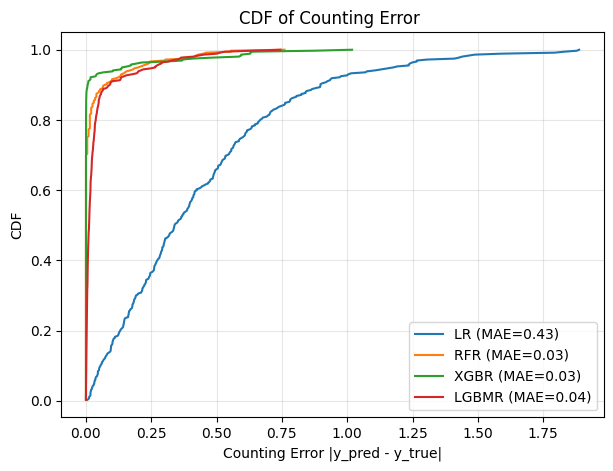

In [83]:
plot_cdf_models(expanded_features_lltf, target_col="target")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.185812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877046
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.539551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,MAE,RMSE,Bias,R²,Acc@0,Acc@±1,Acc@±2
Model,,,,,,,
LR,0.1775,0.2467,-0.0102,0.9400,0.0000,99.4490,100.0000
RFR,0.0319,0.1583,-0.0165,0.9753,70.7989,99.7245,99.7245
XGBR,0.0276,0.2063,-0.0222,0.9580,0.0000,98.8981,99.7245
LGBMR,0.0400,0.1510,-0.0148,0.9775,0.0000,99.4490,100.0000


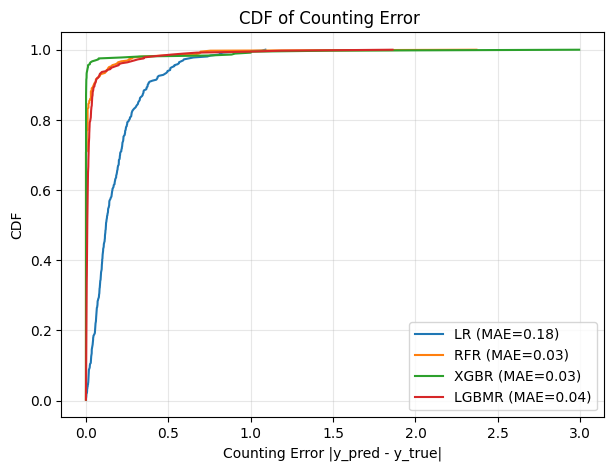

In [84]:
plot_cdf_models(expanded_features_htltf, target_col="target")


In [85]:
# ===========================================================
# Funzione per calcolare CDF per un dataset e un modello
# ===========================================================
def compute_cdf_for_dataset(dataset, model_name, target_col="target"):
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione solo per Linear Regression
    if model_name == "LR":
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    errors = np.abs(y_pred - y_test)
    mae = mean_absolute_error(y_test, y_pred)

    sorted_err = np.sort(errors)
    cdf = np.arange(1, len(errors) + 1) / len(errors)

    return sorted_err, cdf, mae


# ===========================================================
# Funzione per plottare LLTF vs HT-LTF
# ===========================================================
def plot_cdf_comparison(dataset_lltf, dataset_htltf, model_name="RFR", target_col="target"):
    err_lltf, cdf_lltf, mae_lltf = compute_cdf_for_dataset(dataset_lltf, model_name, target_col)
    err_htltf, cdf_htltf, mae_htltf = compute_cdf_for_dataset(dataset_htltf, model_name, target_col)

    plt.figure(figsize=(7,5))
    plt.plot(err_lltf, cdf_lltf, color="tab:blue", linewidth=1.8,
             label=f"LLTF (MAE={mae_lltf:.2f})")
    plt.plot(err_htltf, cdf_htltf, color="tab:orange", linewidth=1.8,
             label=f"HT-LTF (MAE={mae_htltf:.2f})")

    plt.title(f"CDF of Counting Error ({model_name})")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

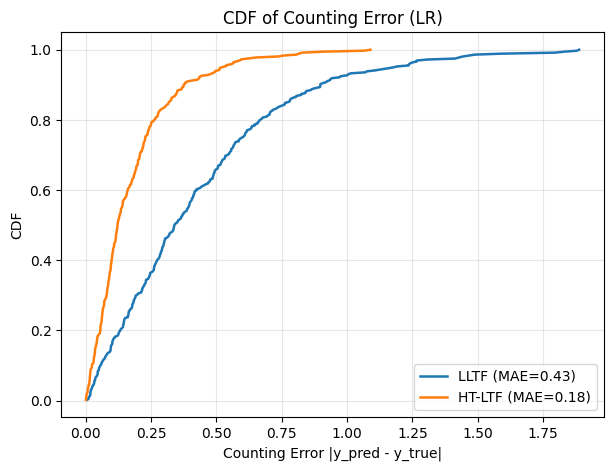

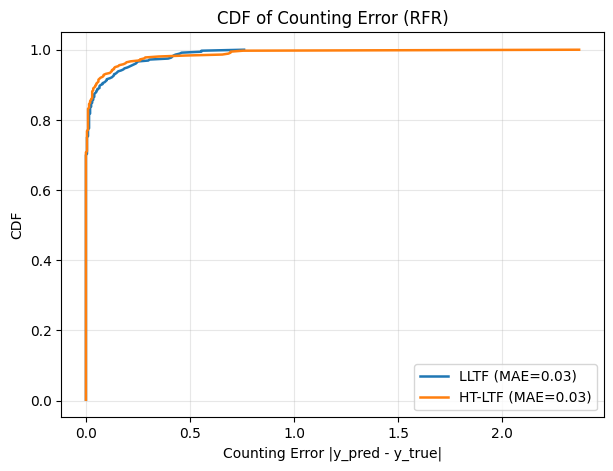

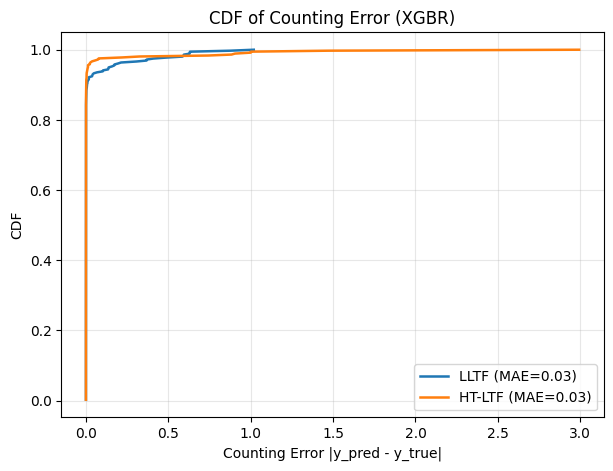

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420658
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.565426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.220408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877046
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.539551
[LightGBM] [

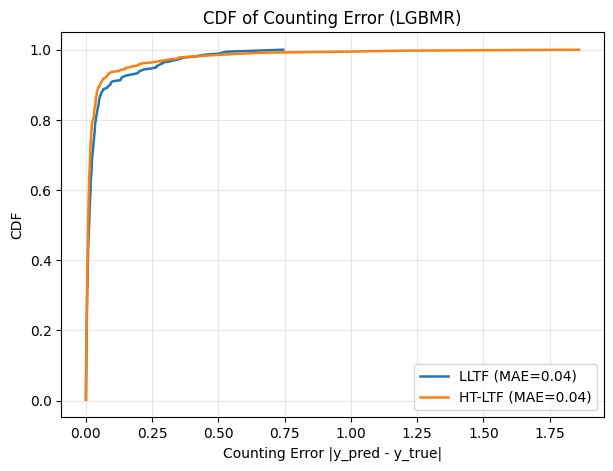

In [86]:
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="RFR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="XGBR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LGBMR")


In [87]:
def feature_group_importance(dataset, target_col="target"):
    """
    Valuta l'utilità di ciascun gruppo di feature (std, avg, iqr, adj, euc, ecc.)
    addestrando un modello separato per ogni gruppo.
    Restituisce un DataFrame con MAE per gruppo.
    """
    groups = {
        "STD": dataset.filter(like="std_"),
        "MIN": dataset.filter(like="min_"),
        "MAX": dataset.filter(like="max_"),
        "AVG": dataset.filter(like="avg_"),
        "QTL": dataset.filter(like="qtl_"),
        "QTU": dataset.filter(like="qtu_"),
        "IQR": dataset.filter(like="iqr_"),
        "ADJ": dataset.filter(like="adj_"),
        "EUC": dataset[["euc"]] if "euc" in dataset.columns else None
    }

    y = dataset[target_col]
    results = {}

    for name, X in groups.items():
        if X is None or X.empty:
            continue

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model = RandomForestRegressor(n_estimators=200, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = mae

    results_df = pd.DataFrame.from_dict(results, orient="index", columns=["MAE"]).sort_values(by="MAE")
    return results_df


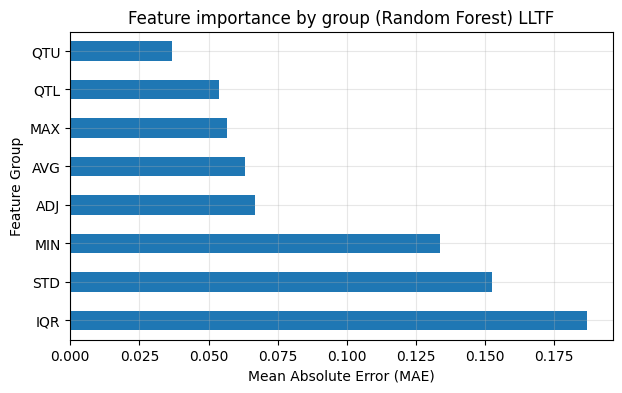

In [88]:
results_lltf = feature_group_importance(expanded_features_lltf, target_col="target")
results_lltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) LLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


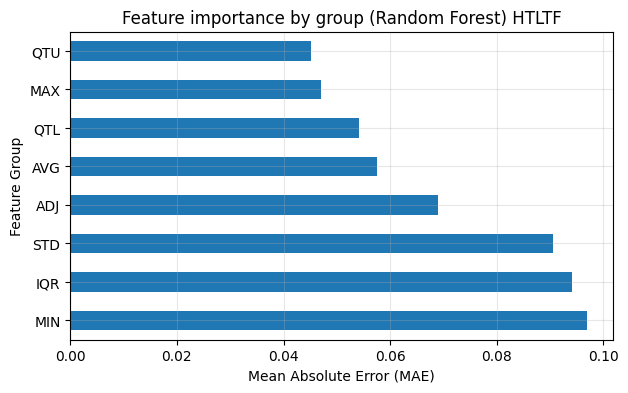

In [89]:
results_htltf = feature_group_importance(expanded_features_htltf, target_col="target")
results_htltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) HTLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


In [90]:
# =======================================================
# Funzione: calcola feature importance per più modelli
# =======================================================
def compute_feature_importances(dataset, target_col="target", top_n=15):
    """
    Calcola e confronta l'importanza delle feature per RandomForest, XGBoost e LightGBM.
    Restituisce i 15 attributi più importanti mediati tra i modelli.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    importances = {}
    feature_names = X.columns

    for name, model in models.items():
        model.fit(X_train, y_train)

        if name == "XGBoost":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        elif name == "LightGBM":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        else:
            imp = model.feature_importances_ / np.sum(model.feature_importances_)

        importances[name] = imp

    # Costruiamo DataFrame con le importanze
    imp_df = pd.DataFrame(importances, index=feature_names)
    imp_df["mean_importance"] = imp_df.mean(axis=1)

    # Selezioniamo le feature più importanti
    top_features = imp_df.sort_values("mean_importance", ascending=False).head(top_n)
    return top_features


# =======================================================
# Funzione: visualizza graficamente
# =======================================================
def plot_feature_importances(top_features):
    plt.figure(figsize=(9, 5))
    top_features[["RandomForest", "XGBoost", "LightGBM"]].plot(kind="barh", figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.title("Feature Importance Comparison (RandomForest / XGBoost / LightGBM)")
    plt.xlabel("Normalized Importance")
    plt.ylabel("Feature")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420932
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.565426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Figure size 900x500 with 0 Axes>

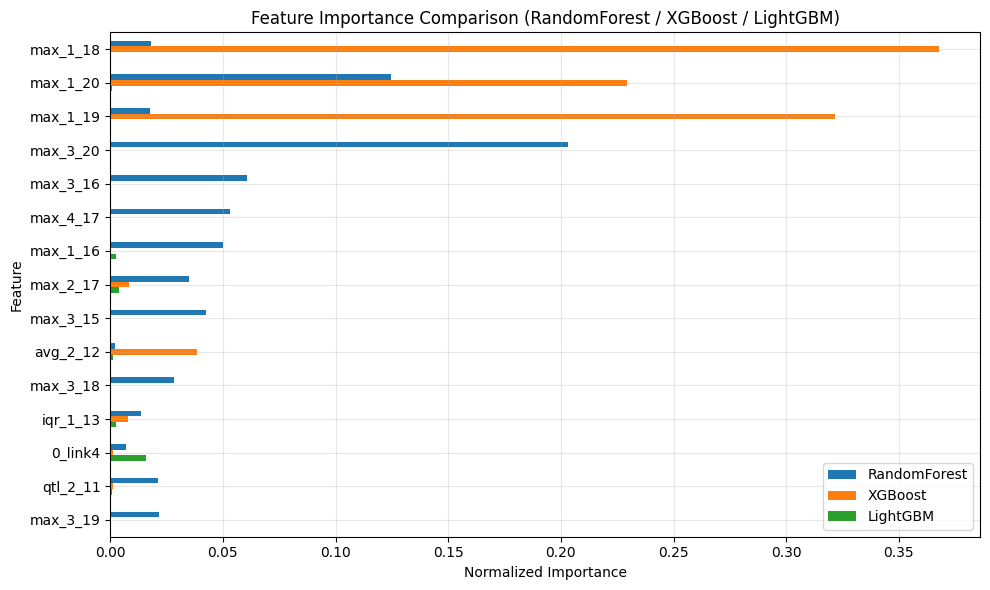

In [91]:
top_features_lltf = compute_feature_importances(expanded_features_lltf, target_col="target", top_n=15)
plot_feature_importances(top_features_lltf)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.210337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877614
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.539551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Figure size 900x500 with 0 Axes>

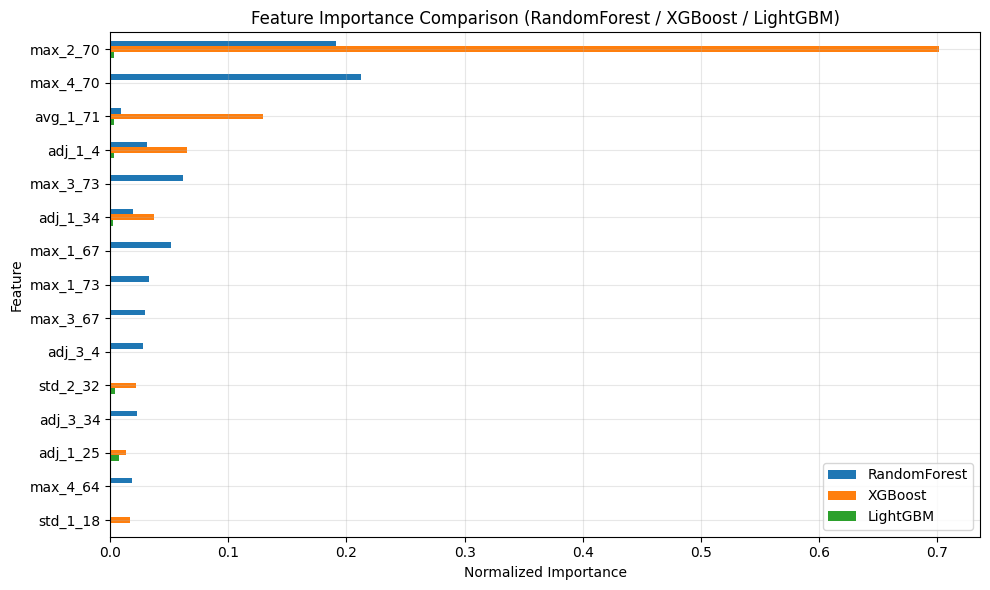

In [92]:
top_features_htltf = compute_feature_importances(expanded_features_htltf, target_col="target", top_n=15)
plot_feature_importances(top_features_htltf)


# Classificazione

In [93]:
# ================================================================
# Funzione: addestra i modelli di classificazione del paper
# ================================================================
def train_classifiers(dataset, target_col="target"):
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        print(f"\n=== {name} ===")
        print(classification_report(y_test, y_pred, digits=3))

        # Confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    # Tabella riassuntiva accuracies
    results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)
    print("\n📊 Summary of accuracies:")
    print(results_df)
    return results_df


==== LLTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       357
   macro avg      1.000     1.000     1.000       357
weighted avg      1.000     1.000     1.000       357



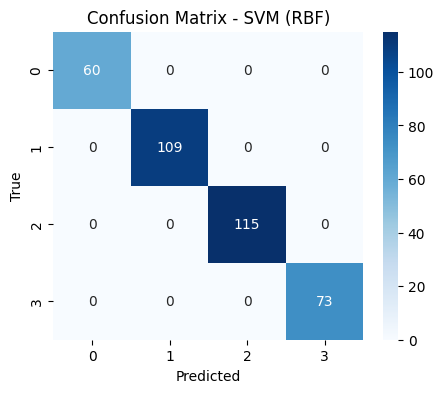


=== KNN ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      0.983     1.000     0.991       115
           3      1.000     0.973     0.986        73

    accuracy                          0.994       357
   macro avg      0.996     0.993     0.994       357
weighted avg      0.994     0.994     0.994       357



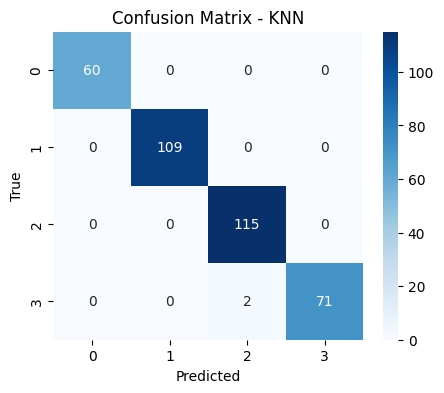


=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      0.966     0.991     0.979       115
           3      0.986     0.945     0.965        73

    accuracy                          0.986       357
   macro avg      0.988     0.984     0.986       357
weighted avg      0.986     0.986     0.986       357



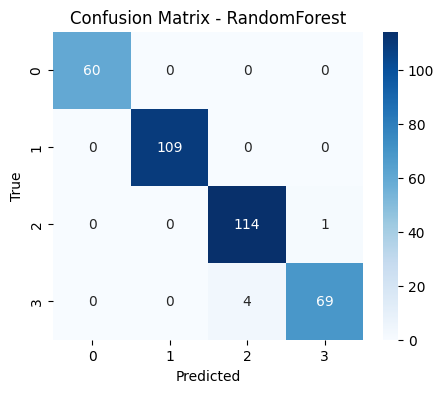

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:21:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      0.991     1.000     0.996       115
           3      1.000     0.986     0.993        73

    accuracy                          0.997       357
   macro avg      0.998     0.997     0.997       357
weighted avg      0.997     0.997     0.997       357



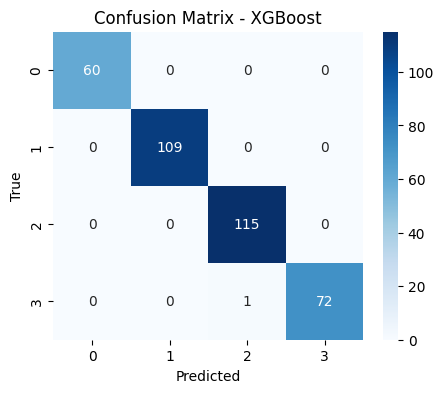

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420932
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score -1.790560
[LightGBM] [Info] Start training from score -1.187699
[LightGBM] [Info] Start training from score -1.126612
[LightGBM] [Info] Start training from score -1.589235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


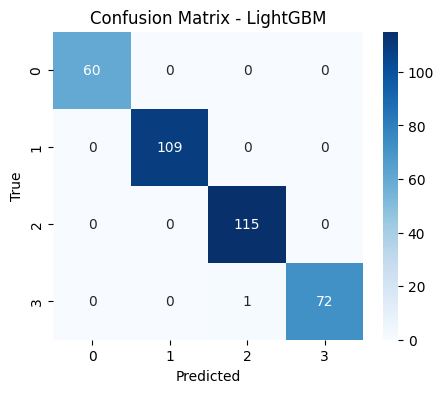


=== GBDT ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      0.983     1.000     0.991       115
           3      1.000     0.973     0.986        73

    accuracy                          0.994       357
   macro avg      0.996     0.993     0.994       357
weighted avg      0.994     0.994     0.994       357



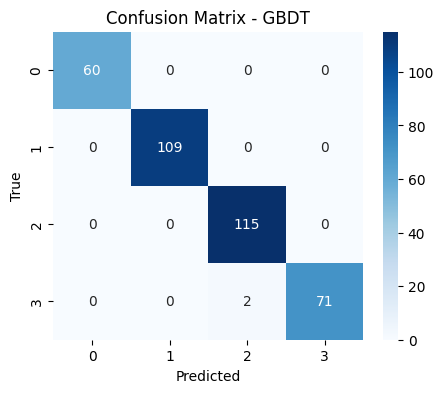


📊 Summary of accuracies:
          Model  Accuracy
0     SVM (RBF)  1.000000
3       XGBoost  0.997199
4      LightGBM  0.997199
1           KNN  0.994398
5          GBDT  0.994398
2  RandomForest  0.985994


In [94]:
print("==== LLTF CLASSIFICATION ====")
acc_lltf = train_classifiers(expanded_features_lltf)


==== HT-LTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



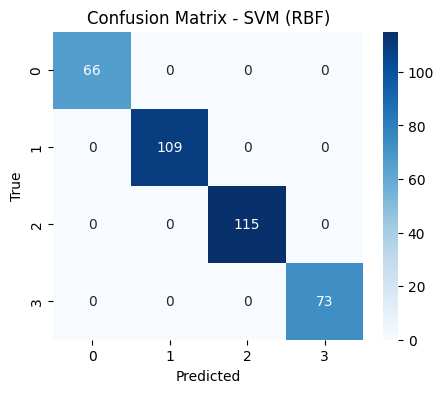


=== KNN ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



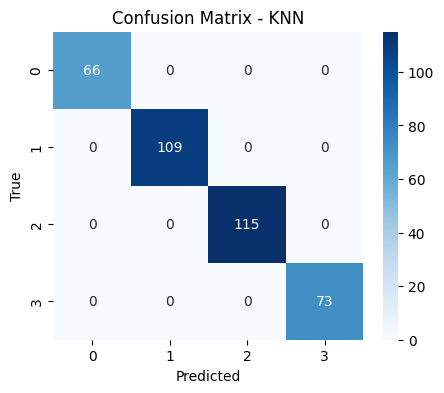


=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



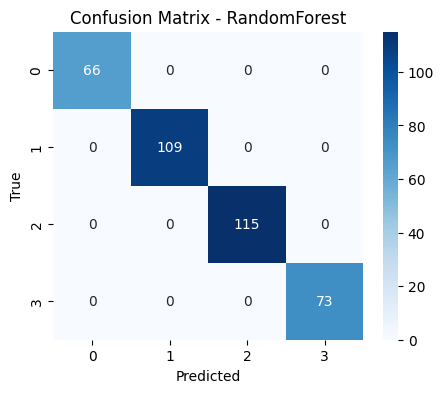

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:31:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      0.991     1.000     0.995       109
           2      0.991     0.991     0.991       115
           3      1.000     0.986     0.993        73

    accuracy                          0.994       363
   macro avg      0.996     0.994     0.995       363
weighted avg      0.995     0.994     0.994       363



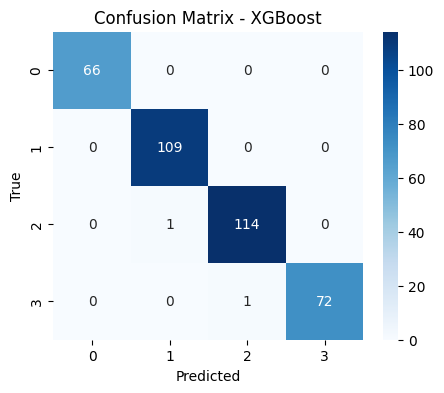

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877614
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score -1.711263
[LightGBM] [Info] Start training from score -1.204366
[LightGBM] [Info] Start training from score -1.143279
[LightGBM] [Info] Start training from score -1.605902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LightGBM ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



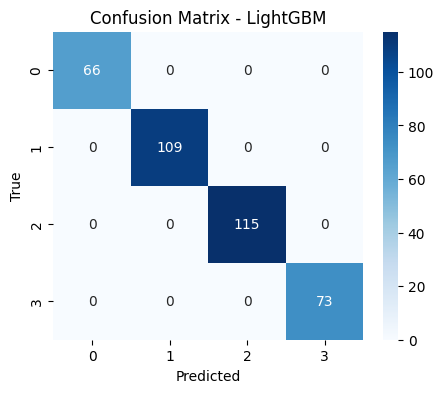


=== GBDT ===
              precision    recall  f1-score   support

           0      1.000     0.985     0.992        66
           1      1.000     1.000     1.000       109
           2      0.975     1.000     0.987       115
           3      1.000     0.973     0.986        73

    accuracy                          0.992       363
   macro avg      0.994     0.989     0.991       363
weighted avg      0.992     0.992     0.992       363



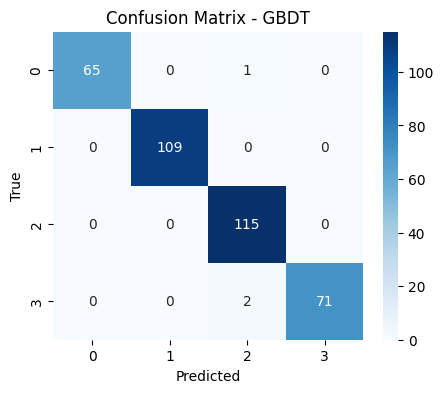


📊 Summary of accuracies:
          Model  Accuracy
0     SVM (RBF)  1.000000
1           KNN  1.000000
2  RandomForest  1.000000
4      LightGBM  1.000000
3       XGBoost  0.994490
5          GBDT  0.991736


In [95]:
print("\n==== HT-LTF CLASSIFICATION ====")
acc_htltf = train_classifiers(expanded_features_htltf)


# k-Fold Cross-Validation

In [96]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline

In [97]:
# ===============================================================
# Funzione: esegue k-Fold CV 
# ===============================================================
def kfold_cross_validation(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per LR, RFR, XGBR e LGBMR.
    Restituisce media e std del MAE per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Definizione modelli
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)
        mae_mean = -scores.mean()
        mae_std = scores.std()
        results[name] = (mae_mean, mae_std)
        print(f"{name:20s} → MAE medio = {mae_mean:.4f} ± {mae_std:.4f}")

    results_df = pd.DataFrame(results, index=["MAE_mean", "MAE_std"]).T
    return results_df

In [98]:
print("===== K-FOLD CROSS-VALIDATION: LLTF =====")
cv_results_lltf = kfold_cross_validation(expanded_features_lltf, target_col="target", n_splits=5)

print("\n===== K-FOLD CROSS-VALIDATION: HT-LTF =====")
cv_results_htltf = kfold_cross_validation(expanded_features_htltf, target_col="target", n_splits=5)


===== K-FOLD CROSS-VALIDATION: LLTF =====
Linear Regression    → MAE medio = 0.2955 ± 0.0167
Random Forest        → MAE medio = 0.0298 ± 0.0098
XGBoost              → MAE medio = 0.0281 ± 0.0160
LightGBM             → MAE medio = 0.0385 ± 0.0052

===== K-FOLD CROSS-VALIDATION: HT-LTF =====
Linear Regression    → MAE medio = 0.1944 ± 0.0098
Random Forest        → MAE medio = 0.0251 ± 0.0042
XGBoost              → MAE medio = 0.0206 ± 0.0076
LightGBM             → MAE medio = 0.0304 ± 0.0041


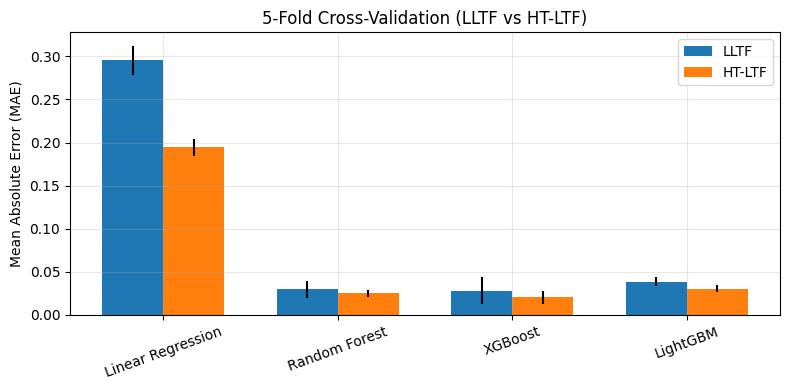

In [99]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_results_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_results_lltf["MAE_mean"], width, yerr=cv_results_lltf["MAE_std"], label="LLTF")
plt.bar(x + width/2, cv_results_htltf["MAE_mean"], width, yerr=cv_results_htltf["MAE_std"], label="HT-LTF")

plt.xticks(x, cv_results_lltf.index, rotation=20)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("5-Fold Cross-Validation (LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [100]:
# =======================================================
# Funzione per k-Fold CV dei modelli di classificazione
# =======================================================
def kfold_classification_cv(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per i modelli di classificazione.
    Ritorna accuracy media e deviazione standard per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    accuracy_scorer = make_scorer(accuracy_score)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=accuracy_scorer, n_jobs=-1)
        acc_mean = scores.mean()
        acc_std = scores.std()
        results[name] = (acc_mean, acc_std)
        print(f"{name:20s} → Accuracy media = {acc_mean:.4f} ± {acc_std:.4f}")

    results_df = pd.DataFrame(results, index=["Accuracy_mean", "Accuracy_std"]).T
    return results_df

In [101]:
print("===== K-FOLD CLASSIFICATION: LLTF =====")
cv_class_lltf = kfold_classification_cv(expanded_features_lltf, target_col="target")

print("\n===== K-FOLD CLASSIFICATION: HT-LTF =====")
cv_class_htltf = kfold_classification_cv(expanded_features_htltf, target_col="target")

===== K-FOLD CLASSIFICATION: LLTF =====
SVM (RBF)            → Accuracy media = 0.9992 ± 0.0017
KNN                  → Accuracy media = 0.9950 ± 0.0049
Random Forest        → Accuracy media = 0.9916 ± 0.0046
XGBoost              → Accuracy media = 0.9966 ± 0.0031
LightGBM             → Accuracy media = 0.9983 ± 0.0034
GBDT                 → Accuracy media = 0.9941 ± 0.0050

===== K-FOLD CLASSIFICATION: HT-LTF =====
SVM (RBF)            → Accuracy media = 1.0000 ± 0.0000
KNN                  → Accuracy media = 1.0000 ± 0.0000
Random Forest        → Accuracy media = 1.0000 ± 0.0000
XGBoost              → Accuracy media = 0.9975 ± 0.0020
LightGBM             → Accuracy media = 0.9992 ± 0.0017
GBDT                 → Accuracy media = 0.9942 ± 0.0062


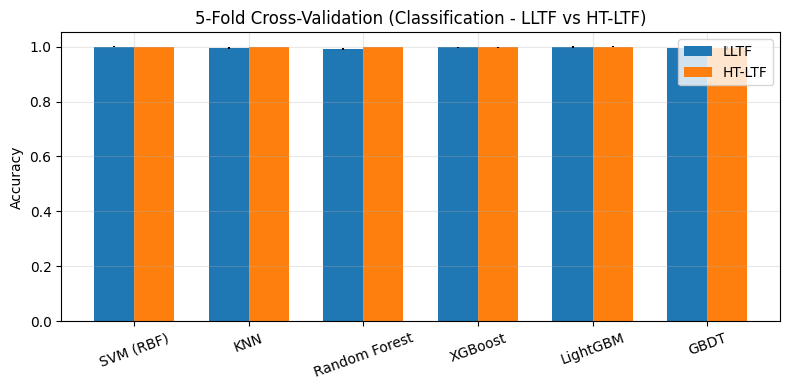

In [102]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_class_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_class_lltf["Accuracy_mean"], width, yerr=cv_class_lltf["Accuracy_std"], label="LLTF")
plt.bar(x + width/2, cv_class_htltf["Accuracy_mean"], width, yerr=cv_class_htltf["Accuracy_std"], label="HT-LTF")

plt.xticks(x, cv_class_lltf.index, rotation=20)
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation (Classification - LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [103]:
import seaborn as sns
import math

In [113]:
def train_classifiers_2(dataset, target_col="target"):

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42,
                                 use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    # Risultati
    f1_results = {}
    accuracy_results = {}
    metrics_table = []

    # -------------------------------
    # FIGURA UNICA DELLE CONFUSION MATRIX
    # -------------------------------
    n_models = len(models)
    n_cols = 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy
        accuracy_results[name] = accuracy_score(y_test, y_pred)

        # Report
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        f1_macro = report_dict["macro avg"]["f1-score"]
        f1_results[name] = f1_macro

        # METRICHE DETTAGLIATE
        for label, values in report_dict.items():
            if label.isdigit():
                metrics_table.append({
                    "Model": name,
                    "Class": label,
                    "Precision": values["precision"],
                    "Recall": values["recall"],
                    "F1-score": values["f1-score"],
                    "Support": values["support"]
                })

        # Confusion matrix
        ax = axes[idx]
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f",
                    cmap="Blues", ax=ax)
        ax.set_title(f"{name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")

    # Rimuove subplot vuoti
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig("confusion_matrices_lltf_2.png", dpi=300)
    plt.show()
    print("\n📁 Confusion matrices salvate in: confusion_matrices_lltf_2.png")

    # -------------------------------
    # TABELLA RIASSUNTIVA ORDINATA PER F1 MACRO
    # -------------------------------
    f1_df = pd.DataFrame(
        {"Model": list(f1_results.keys()), "F1_macro": list(f1_results.values())}
    ).sort_values("F1_macro", ascending=False)

    print("\n📊 Summary of F1 Macro scores:")
    print(f1_df)

    f1_df.to_latex("f1_scores_table_lltf_2.tex", index=False)
    print("📁 Tabella F1 score salvata in: f1_scores_table_lltf_2.tex")

    # -------------------------------
    # TABELLA COMPLETA DELLE METRICHE
    # -------------------------------
    metrics_df = pd.DataFrame(metrics_table)

    print("\n📋 Full Classification Metrics Table:")
    print(metrics_df)

    metrics_df.to_latex("full_metrics_table_lltf_2.tex", index=False)
    print("📁 Tabella completa metriche salvata in: full_metrics_table_lltf_2.tex")

    return f1_df, metrics_df



==== HT-LTF CLASSIFICATION ====


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:39:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.208994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877614
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score -1.711263
[LightGBM] [Info] Start training from score -1.204366
[LightGBM] [Info] Start training from score -1.143279
[LightGBM] [Info] Start training from score -1.605902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


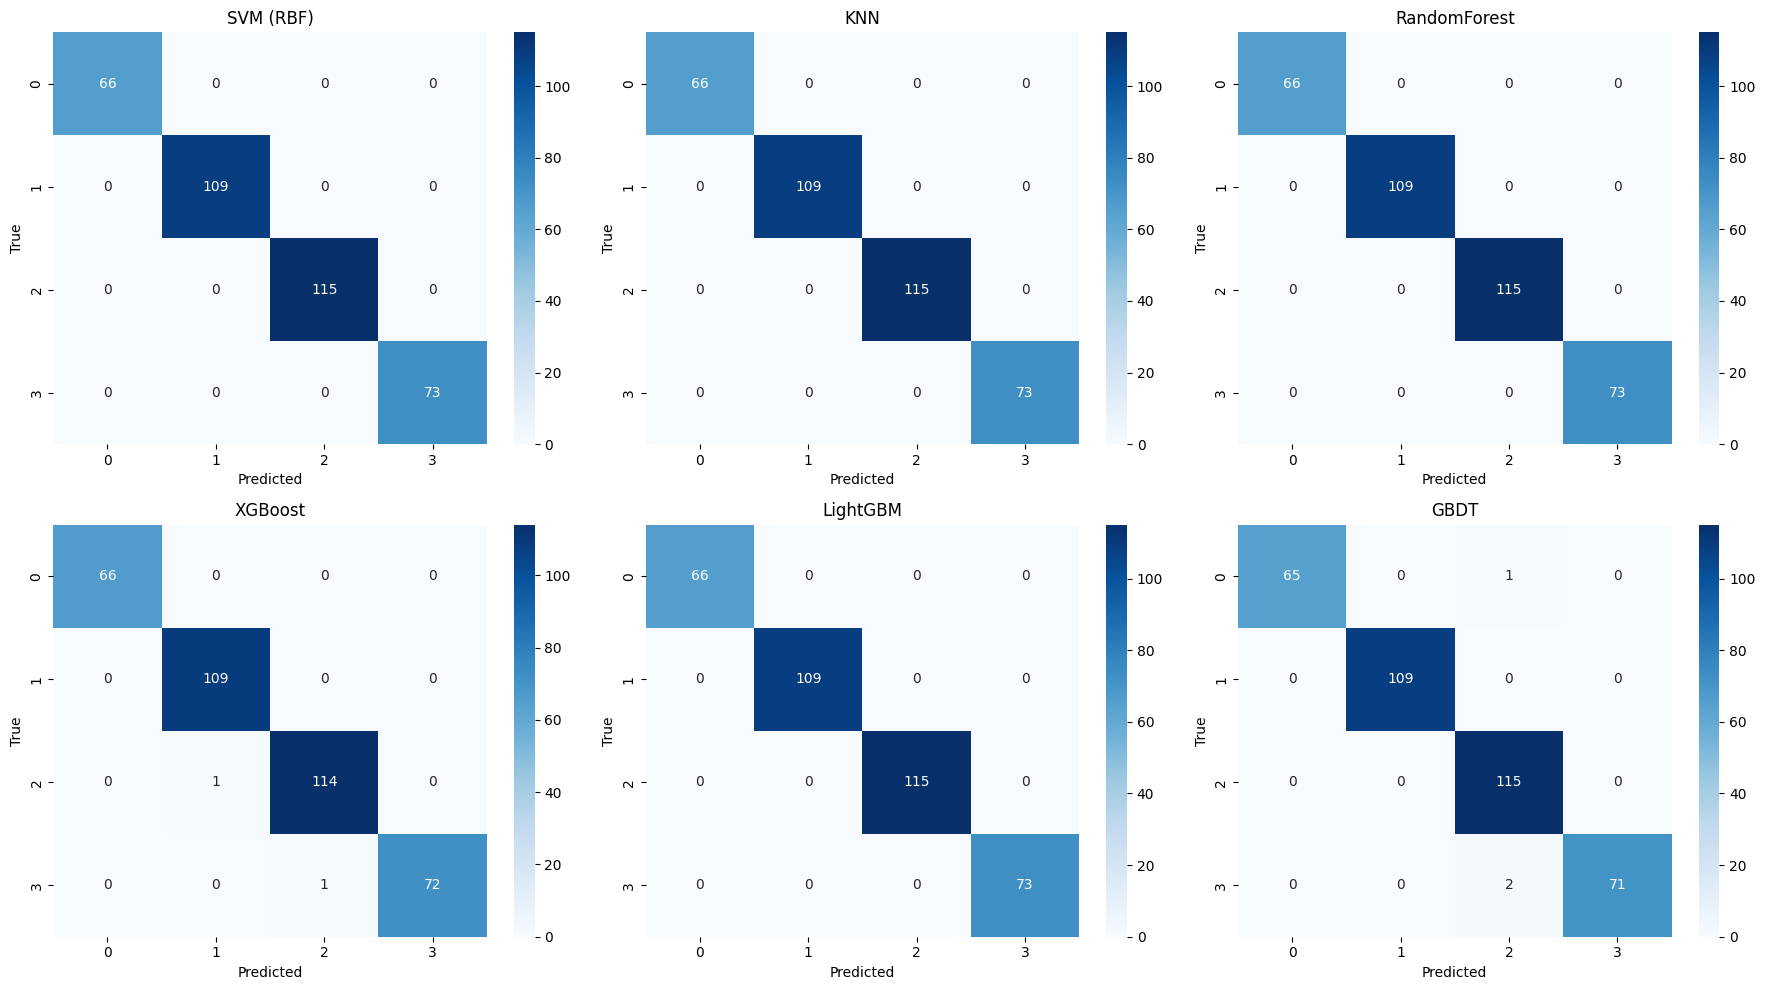


📁 Confusion matrices salvate in: confusion_matrices_2.png

📊 Summary of F1 Macro scores:
          Model  F1_macro
0     SVM (RBF)   1.00000
1           KNN   1.00000
2  RandomForest   1.00000
4      LightGBM   1.00000
3       XGBoost   0.99496
5          GBDT   0.99140
📁 Tabella F1 score salvata in: f1_scores_table_2.tex

📋 Full Classification Metrics Table:
           Model Class  Precision    Recall  F1-score  Support
0      SVM (RBF)     0   1.000000  1.000000  1.000000     66.0
1      SVM (RBF)     1   1.000000  1.000000  1.000000    109.0
2      SVM (RBF)     2   1.000000  1.000000  1.000000    115.0
3      SVM (RBF)     3   1.000000  1.000000  1.000000     73.0
4            KNN     0   1.000000  1.000000  1.000000     66.0
5            KNN     1   1.000000  1.000000  1.000000    109.0
6            KNN     2   1.000000  1.000000  1.000000    115.0
7            KNN     3   1.000000  1.000000  1.000000     73.0
8   RandomForest     0   1.000000  1.000000  1.000000     66.0
9   Ran

In [108]:
print("\n==== HT-LTF CLASSIFICATION ====")
f1_df, metrics_df = train_classifiers_2(expanded_features_htltf)


==== LLTF CLASSIFICATION ====


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:41:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420932
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score -1.790560
[LightGBM] [Info] Start training from score -1.187699
[LightGBM] [Info] Start training from score -1.126612
[LightGBM] [Info] Start training from score -1.589235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


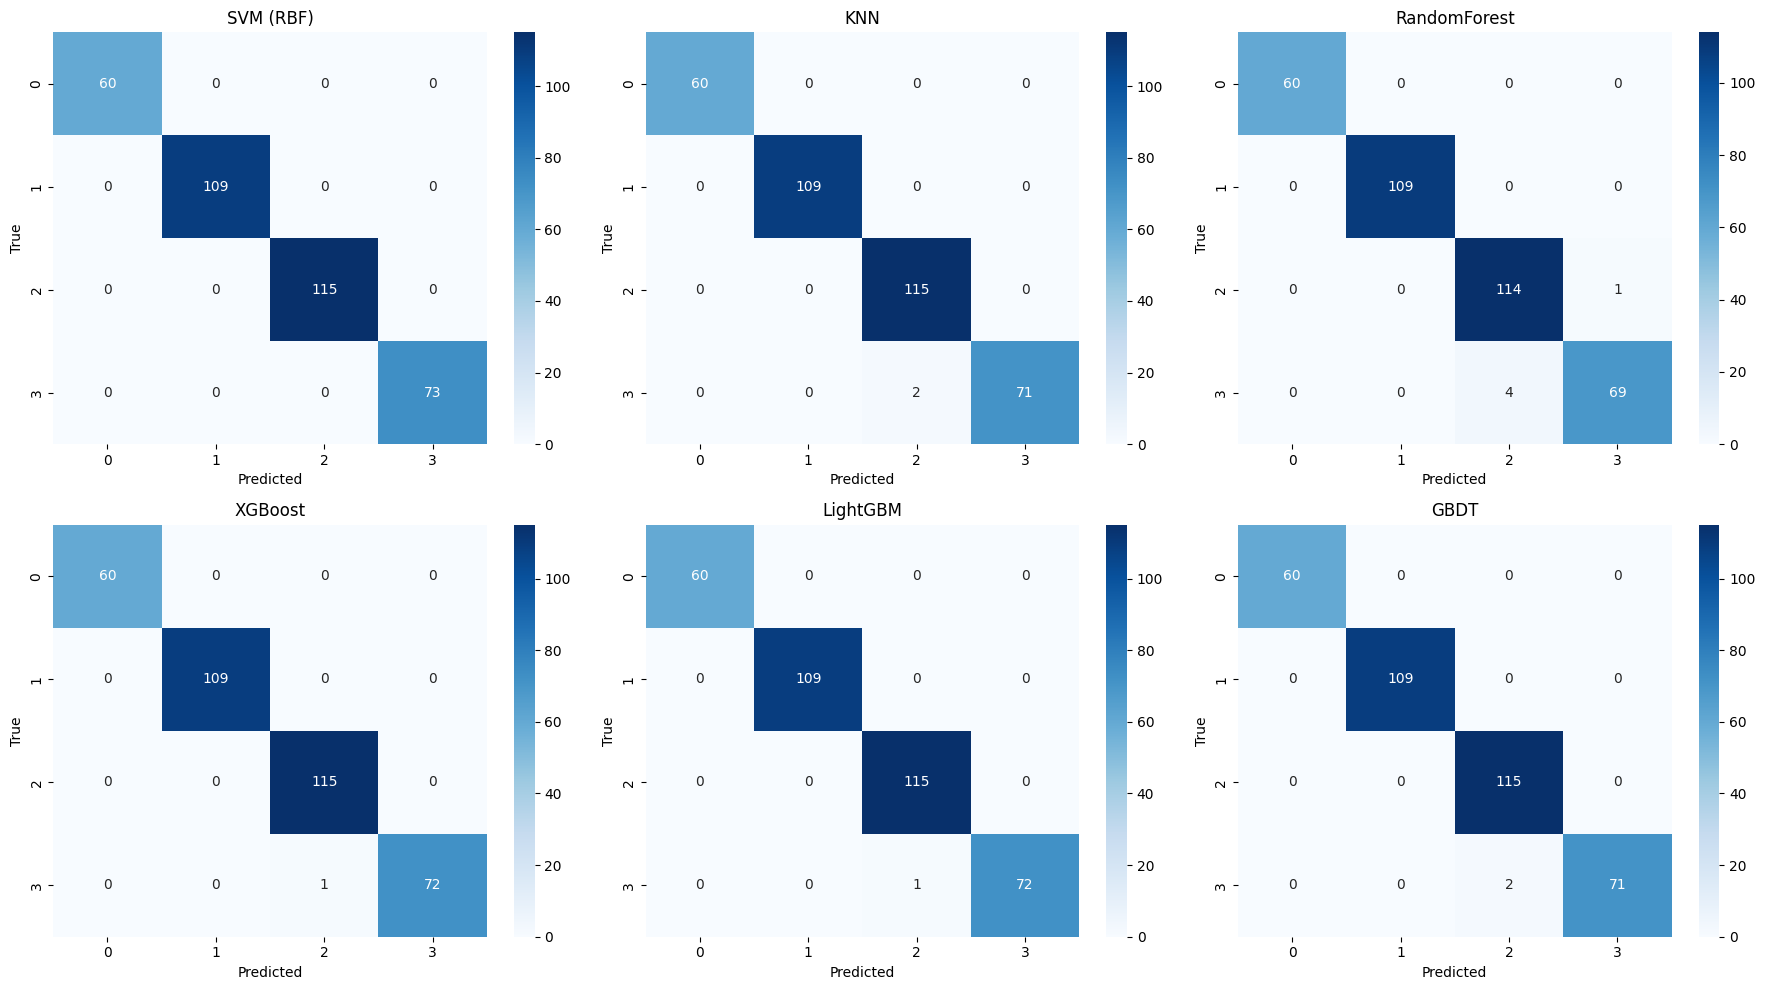


📁 Confusion matrices salvate in: confusion_matrices_lltf_2.png

📊 Summary of F1 Macro scores:
          Model  F1_macro
0     SVM (RBF)  1.000000
3       XGBoost  0.997194
4      LightGBM  0.997194
1           KNN  0.994373
5          GBDT  0.994373
2  RandomForest  0.985894
📁 Tabella F1 score salvata in: f1_scores_table_lltf_2.tex

📋 Full Classification Metrics Table:
           Model Class  Precision    Recall  F1-score  Support
0      SVM (RBF)     0   1.000000  1.000000  1.000000     60.0
1      SVM (RBF)     1   1.000000  1.000000  1.000000    109.0
2      SVM (RBF)     2   1.000000  1.000000  1.000000    115.0
3      SVM (RBF)     3   1.000000  1.000000  1.000000     73.0
4            KNN     0   1.000000  1.000000  1.000000     60.0
5            KNN     1   1.000000  1.000000  1.000000    109.0
6            KNN     2   0.982906  1.000000  0.991379    115.0
7            KNN     3   1.000000  0.972603  0.986111     73.0
8   RandomForest     0   1.000000  1.000000  1.000000     60

In [114]:
print("\n==== LLTF CLASSIFICATION ====")
f1_df, metrics_df = train_classifiers_2(expanded_features_lltf)

In [115]:
def train_regressors_2(dataset, target_col="target"):

    # --------------------------
    # PREPROCESSING
    # --------------------------
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # --------------------------
    # MODELLI DI REGRESSIONE
    # --------------------------
    models = {
        "SVR (RBF)": SVR(kernel="rbf", C=10, gamma="scale"),
        "KNN Regr": KNeighborsRegressor(n_neighbors=5),
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    metrics_list = []

    # --------------------------
    # FIGURA UNICA DEI PLOT
    # --------------------------
    n_models = len(models)
    n_cols = 3
    n_rows = math.ceil(n_models / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # --------------------------
        # CALCOLO METRICHE
        # --------------------------
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        metrics_list.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })

        # --------------------------
        # SCATTER PLOT TRUE vs PRED
        # --------------------------
        ax = axes[idx]
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, s=20, alpha=0.6)
        ax.set_title(f"{name}")
        ax.set_xlabel("True")
        ax.set_ylabel("Predicted")
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

    # rimuovere subplot vuoti
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig("regression_results_lltf_2.png", dpi=300)
    plt.show()

    print("\n📁 Figura salvata in: regression_results_lltf_2.png")

    # --------------------------
    # TABELLA METRICHE
    # --------------------------
    metrics_df = pd.DataFrame(metrics_list)

    metrics_df_sorted = metrics_df.sort_values("RMSE", ascending=True)

    print("\n📊 Regression Metrics (sorted by RMSE):")
    print(metrics_df_sorted)

    # Salvataggio LaTeX
    metrics_df_sorted.to_latex("regression_metrics_table_lltf_2.tex", index=False)
    print("📁 Tabella metriche salvata in: regression_metrics_table_lltf_2.tex")

    return metrics_df_sorted



==== LLTF REGRESSIONE ====
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420898
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.597839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


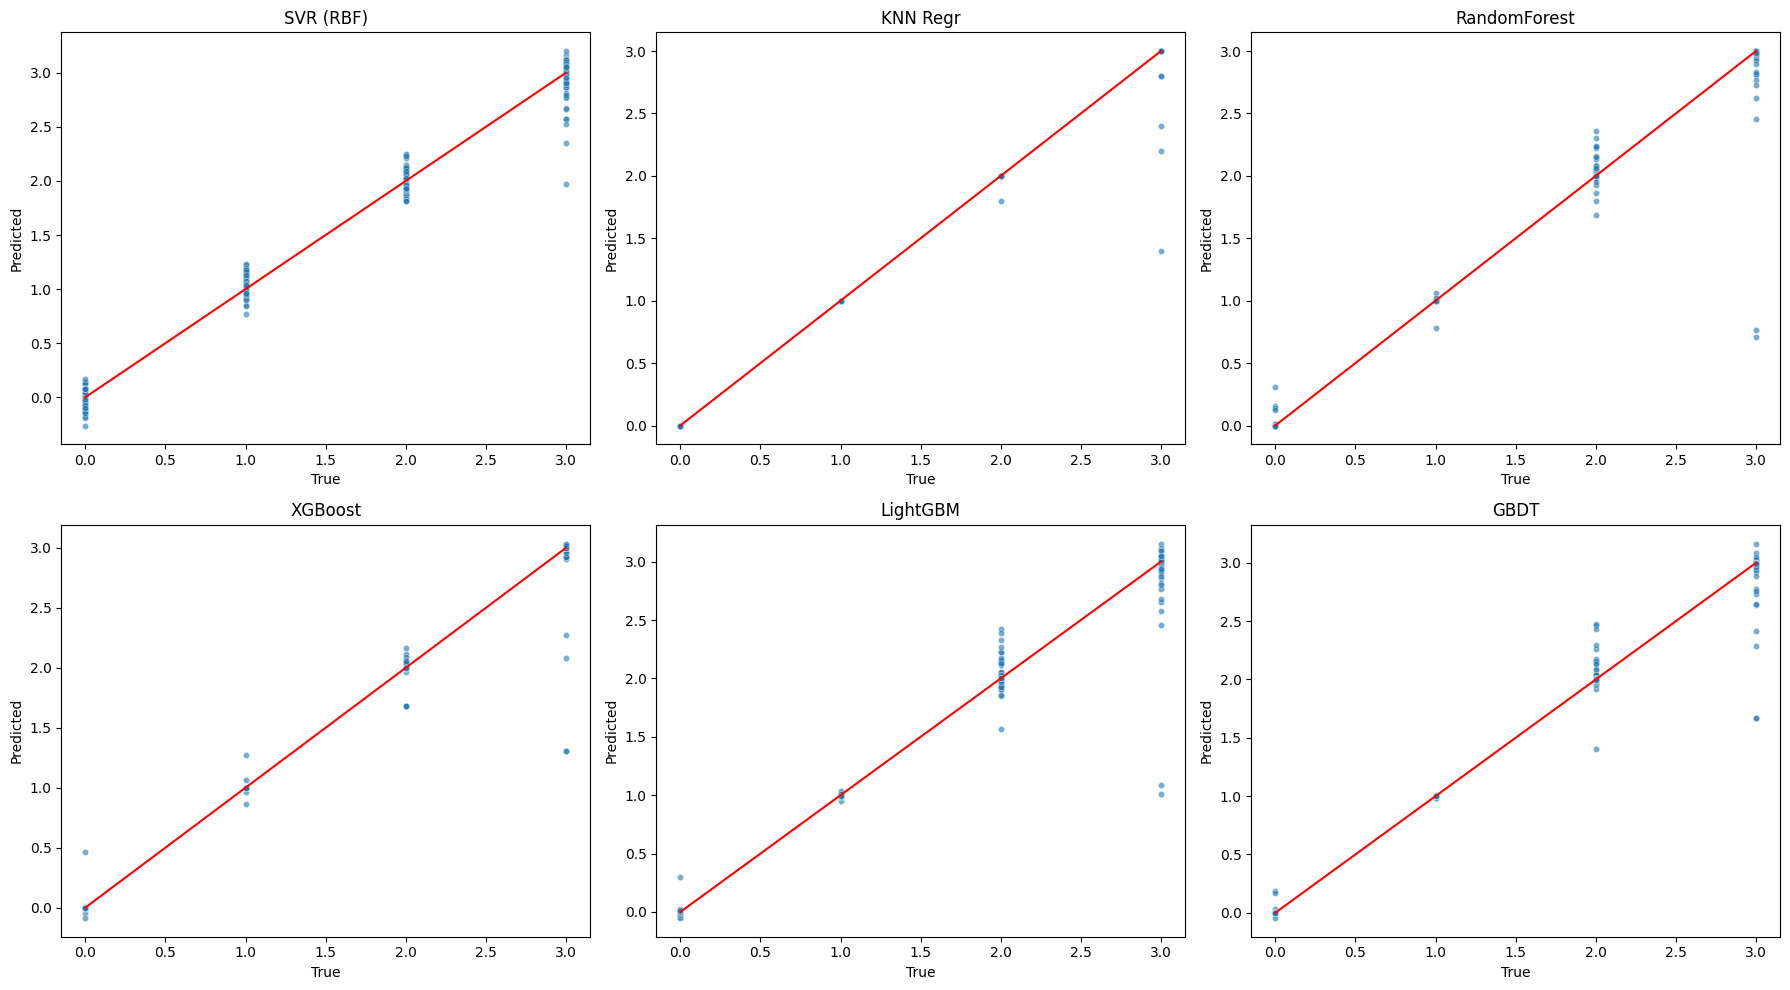


📁 Figura salvata in: regression_results_lltf_2.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2
1      KNN Regr  0.010084  0.010308  0.101529  0.988753
0     SVR (RBF)  0.079185  0.014241  0.119334  0.984462
5          GBDT  0.031176  0.017404  0.131925  0.981010
3       XGBoost  0.023613  0.021870  0.147885  0.976138
4      LightGBM  0.042469  0.027355  0.165394  0.970153
2  RandomForest  0.032031  0.032990  0.181632  0.964004
📁 Tabella metriche salvata in: regression_metrics_table_lltf_2.tex


In [116]:
print("\n==== LLTF REGRESSIONE ====")
metrics_df_sorted_LLTF= train_regressors_2(expanded_features_lltf)


==== HT-LTF CLASSIFICATION ====
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.197079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877594
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.548996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


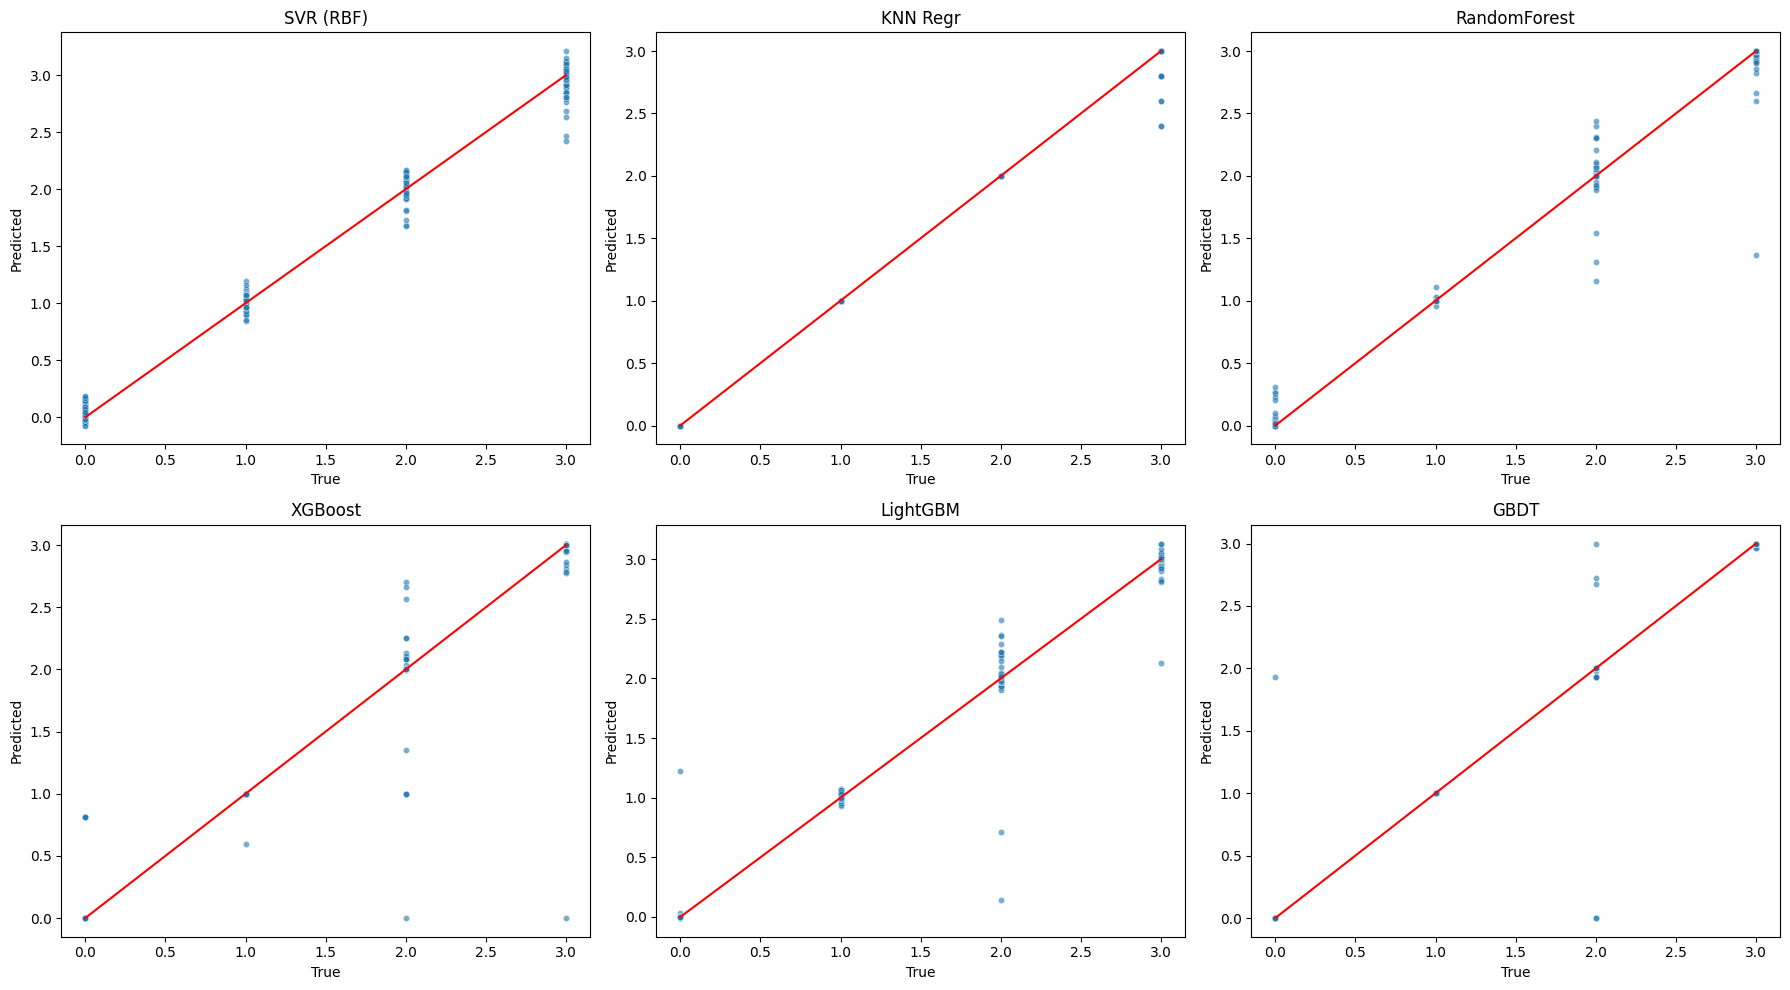


📁 Figura salvata in: regression_results_2.png

📊 Regression Metrics (sorted by RMSE):
          Model       MAE       MSE      RMSE        R2
1      KNN Regr  0.007713  0.003306  0.057496  0.996617
0     SVR (RBF)  0.065263  0.008504  0.092217  0.991296
2  RandomForest  0.030000  0.015311  0.123737  0.984330
4      LightGBM  0.038358  0.023616  0.153674  0.975830
5          GBDT  0.023945  0.037862  0.194581  0.961249
3       XGBoost  0.045632  0.057391  0.239564  0.941261
📁 Tabella metriche salvata in: regression_metrics_table_2.tex


In [ ]:
print("\n==== HT-LTF REGRESSIONE ====")
metrics_df_sorted_HTLTF= train_regressors_2(expanded_features_htltf)